In [1]:
import MyTensor as MT
inputtensor=MT.mytensor([[3,4,2],[1,2,3]])

In [2]:
1/inputtensor
MT.mytensor.computegraph._edgelist

[{'from': 0, 'to': 2, 'forward': {'op': 'mytensor.__rtruediv__', 'with': 1}}]

In [2]:
import MyNN as MN 
layer1=MN.my_linear_layer(in_feature=3,out_feature=4)
#layer2=MN.my_linear_layer(in_feature=4,out_feature=6)
#layer3=MN.my_linear_layer(in_feature=6,out_feature=4)

In [3]:
pred1=layer1(inputtensor)
#pred2=layer2(pred1)
#pred3=layer3(pred2)

In [4]:
MT.mytensor.computegraph._edgelist

[{'from': 0, 'to': 2, 'forward': {'op': 'dot', 'with': 1, 'pos': 'right'}},
 {'from': 1, 'to': 2, 'forward': {'op': 'dot', 'with': 0, 'pos': 'left'}},
 {'from': 3, 'to': 5, 'forward': {'op': 'dot', 'with': 4, 'pos': 'right'}},
 {'from': 4, 'to': 5, 'forward': {'op': 'dot', 'with': 3, 'pos': 'left'}},
 {'from': 2, 'to': 6, 'forward': {'op': 'add', 'with': 5, 'pos': 'right'}},
 {'from': 5, 'to': 6, 'forward': {'op': 'add', 'with': 2, 'pos': 'left'}}]

In [4]:
label_true=MT.mytensor([[0,1,1,2],[2,1,3,0]])

In [5]:
label_true

tensor32([[0. 1. 1. 2.]
 [2. 1. 3. 0.]])

In [6]:
len(MT.mytensor.computegraph._edgelist)

6

In [7]:
import Loss

In [8]:
L1 = Loss.L1()

In [9]:
L1(pred1,label_true)

11.984853

In [10]:
L1.backward(mode = 'force')

tensor32([[0.5]])


In [11]:
cg = MT.mytensor.computegraph

In [12]:
cg._nodelist[1].__dict__

{'tensortype': 'tensor32',
 'with_grad': True,
 '_cg_descend': [2],
 '_cg_ascend': [],
 '_grad_f': tensor32([[-2.          1.9999999  -1.9999999   0.9999999 ]
  [-3.          2.9999998  -3.          0.9999999 ]
  [-2.5         2.4999998  -2.5        -0.50000006]]),
 'grad': tensor32([[-2.          1.9999999  -1.9999999   0.9999999 ]
  [-3.          2.9999998  -3.          0.9999999 ]
  [-2.5         2.4999998  -2.5        -0.50000006]]),
 'npar_data': array([[-0.5165363 ,  0.04542432, -0.975878  ,  0.19529498],
        [-0.44510156,  0.87301093,  0.04951663,  0.8299451 ],
        [-0.2578847 ,  0.06004273, -0.7708808 , -0.71225375]],
       dtype=float32),
 'shape': (3, 4),
 '_is_para': True}

In [13]:
for i in cg._nodelist:
    print(type(i))

<class 'MyTensor.mytensor'>
<class 'MyPara.myparameter'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'MyPara.myparameter'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'int'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'int'>
<class 'MyTensor.mytensor'>
<class 'float'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>
<class 'MyTensor.mytensor'>


In [14]:
for i in cg._nodelist:
    print(i)

tensor32([[3. 4. 2.]
 [1. 2. 3.]])
myparameter([[-0.5165363   0.04542432 -0.975878    0.19529498]
 [-0.44510156  0.87301093  0.04951663  0.8299451 ]
 [-0.2578847   0.06004273 -0.7708808  -0.71225375]], tensor32)
tensor32([[-3.8457847  3.748402  -4.271329   2.4811578]
 [-2.1803937  1.9715744 -3.1894872 -0.2815761]])
tensor32([[1.]
 [1.]])
myparameter([[0. 0. 0. 0.]], tensor32)
tensor32([[0. 0. 0. 0.]
 [0. 0. 0. 0.]])
tensor32([[-3.8457847  3.748402  -4.271329   2.4811578]
 [-2.1803937  1.9715744 -3.1894872 -0.2815761]])
tensor32([[0. 1. 1. 2.]
 [2. 1. 3. 0.]])
-1
tensor32([[-0. -1. -1. -2.]
 [-2. -1. -3. -0.]])
tensor32([[-3.8457847   2.748402   -5.271329    0.48115778]
 [-4.1803937   0.9715744  -6.1894875  -0.2815761 ]])
2
tensor32([[14.79006     7.5537143  27.78691     0.23151281]
 [17.47569     0.94395685 38.309753    0.0792851 ]])
0.5
tensor32([[3.8457847  2.748402   5.271329   0.48115778]
 [4.1803937  0.9715744  6.1894875  0.2815761 ]])
tensor32([[1.]
 [1.]
 [1.]
 [1.]])
tensor32([

In [15]:
L1._tensorloss

tensor32([[11.984853]])

In [16]:
MT.mytensor.computegraph._lossnodes_index

[19]

In [17]:
len(MT.mytensor.computegraph._edgelist)

16

In [18]:
cg=MT.mytensor.computegraph

In [19]:
cg._lossnodes_index

[19]

In [20]:
import networkx as nx

In [21]:
simple_DiG=nx.DiGraph()

In [22]:
cg._nodelist[0].__dict__

{'tensortype': 'tensor32',
 'with_grad': True,
 '_cg_descend': [2],
 '_cg_ascend': [],
 '_grad_f': tensor32([[0.8665668  1.0492704  0.18827723]
  [0.67127186 0.21932536 0.90053105]]),
 'grad': tensor32([[0.8665668  1.0492704  0.18827723]
  [0.67127186 0.21932536 0.90053105]]),
 'npar_data': array([[3., 4., 2.],
        [1., 2., 3.]], dtype=float32),
 'shape': (2, 3)}

In [23]:
for i in cg._edgelist:
    simple_DiG.add_edge(i['from'],i['to'])

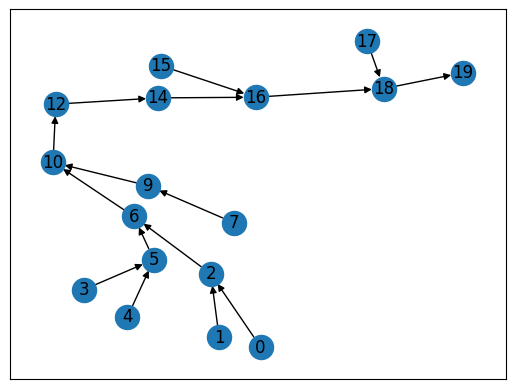

In [24]:
nx.draw_networkx(simple_DiG,pos=nx.spring_layout(simple_DiG))

In [25]:
counter=0
for i in cg._nodelist:
    print(counter)
    counter+=1
    if type(i).__name__ == 'mytensor' or type(i).__name__ == 'mytensorloss' or type(i).__name__ == 'myparameter':
        print(i.__dict__)
        print('==================================')
    else:
        print(i)
        print('==================================')

0
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [2], '_cg_ascend': [], '_grad_f': tensor32([[0.8665668  1.0492704  0.18827723]
 [0.67127186 0.21932536 0.90053105]]), 'grad': tensor32([[0.8665668  1.0492704  0.18827723]
 [0.67127186 0.21932536 0.90053105]]), 'npar_data': array([[3., 4., 2.],
       [1., 2., 3.]], dtype=float32), 'shape': (2, 3)}
1
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [2], '_cg_ascend': [], '_grad_f': tensor32([[-2.          1.9999999  -1.9999999   0.9999999 ]
 [-3.          2.9999998  -3.          0.9999999 ]
 [-2.5         2.4999998  -2.5        -0.50000006]]), 'grad': tensor32([[-2.          1.9999999  -1.9999999   0.9999999 ]
 [-3.          2.9999998  -3.          0.9999999 ]
 [-2.5         2.4999998  -2.5        -0.50000006]]), 'npar_data': array([[-0.5165363 ,  0.04542432, -0.975878  ,  0.19529498],
       [-0.44510156,  0.87301093,  0.04951663,  0.8299451 ],
       [-0.2578847 ,  0.06004273, -0.7708808 , -0.71225375]],
      

In [31]:
cg._computegraph__find_edges(10,12)

{'from': 10, 'to': 12, 'forward': {'op': 'mytensor.__pow__', 'with': 11}}

In [34]:
L1.scalar

11.379904

In [36]:
cg._nodelist[11]

2

In [25]:
cg._nodelist[2]

tensor32([[ 8.522778   -2.5620975   2.4791775   0.94780594]
 [ 6.703035   -2.2524216  -3.5722506  -1.2421455 ]])

In [26]:
cg._nodelist[0]

tensor32([[3. 4. 2.]
 [1. 2. 3.]])

In [27]:
# search for the longest path
def longest():
    pass

In [28]:
cg._parameternodes_index

[1, 4, 7, 10, 13, 16]

In [29]:
paths=[]
for i in cg._parameternodes_index:
    for j in cg._valid_path_reversed:
        if j['pointer']==i:
            paths.append(j)
longest=None
length=0
for i in paths:
    if len(i['path'])>length:
        longest=i
        length=len(i['path'])

In [20]:
import Gradlib as GL

In [105]:
cg._nodelist[26].__dict__

{'tensortype': 'tensor32',
 'with_grad': False,
 '_cg_descend': [28],
 '_cg_ascend': [24],
 '_grad': tensor32([[61.784706 61.784706 61.784706 61.784706]
  [55.208027 55.208027 55.208027 55.208027]]),
 'npar_data': array([[ 9.02311   ,  0.33579683, 17.236443  , 35.189354  ],
        [ 5.5673065 , 13.829675  ,  6.153961  , 29.657085  ]],
       dtype=float32),
 'grad': None,
 'shape': (2, 4)}

In [32]:
### exmaple of backpropagation, for dot
for i in paths[1]['path']:
    path = cg._edgelist[i]
    print(path)
    op = path['forward']['op']
    last_grad = cg._nodelist[path['to']]._grad
    local_grad = GL.grad_basic(op,cg._nodelist[path['from']],cg._nodelist[path['forward']['with']])
    if op == 'dot':
        if path['forward']['pos']=='right':
            cg._nodelist[path['from']]._grad = MT.dot.__wrapped__(last_grad,local_grad)
        else:
            cg._nodelist[path['from']]._grad = MT.dot.__wrapped__(local_grad,last_grad)
    else:
        cg._nodelist[path['from']]._grad = MT.hadamard.__wrapped__(last_grad,local_grad)

{'from': 26, 'to': 28, 'forward': {'op': 'dot', 'with': 27, 'pos': 'right'}}
{'from': 24, 'to': 26, 'forward': {'op': 'mytensor.__pow__', 'with': 25}}
{'from': 22, 'to': 24, 'forward': {'op': 'mytensor.__pow__', 'with': 23}}
{'from': 18, 'to': 22, 'forward': {'op': 'add', 'with': 21, 'pos': 'right'}}
{'from': 14, 'to': 18, 'forward': {'op': 'add', 'with': 17, 'pos': 'right'}}
{'from': 12, 'to': 14, 'forward': {'op': 'dot', 'with': 13, 'pos': 'right'}}
{'from': 8, 'to': 12, 'forward': {'op': 'add', 'with': 11, 'pos': 'right'}}
{'from': 6, 'to': 8, 'forward': {'op': 'dot', 'with': 7, 'pos': 'right'}}
{'from': 5, 'to': 6, 'forward': {'op': 'add', 'with': 2, 'pos': 'left'}}
{'from': 4, 'to': 5, 'forward': {'op': 'dot', 'with': 3, 'pos': 'left'}}


In [33]:
cg._parameternodes_index

[1, 4, 7, 10, 13, 16]

In [34]:
cg._nodelist[0]._cg_descend

[2]

In [29]:
cg._nodelist[28]._grad=L1._tensorloss

In [19]:
def find_edges(cg, nodefrom, nodeto):
    for i in cg._edgelist:
        if i['from']==nodefrom and i['to']==nodeto:
            return i

In [25]:
def grad_recursive(paranode):
    if paranode._grad is None:
        paranode._grad = MT.zeros(paranode.shape)
    for i in paranode._cg_descend:
        edge = find_edges(cg,cg._nodelist.index(paranode),i)
        #return edge
        local_grad = GL.grad_basic(edge['forward']['op'],cg._nodelist[edge['from']],cg._nodelist[edge['forward']['with']])
        if cg._nodelist[i]._grad is None:
            cg._nodelist[i]._grad = grad_recursive(cg._nodelist[i])
        previous_grad = cg._nodelist[i]._grad
        if edge['forward']['pos']=='right':
            paranode._grad = MT.add.__wrapped__(paranode._grad,MT.dot.__wrapped__(previous_grad,local_grad))
        else:
            paranode._grad = MT.add.__wrapped__(paranode._grad,MT.dot.__wrapped__(local_grad,previous_grad))
    return paranode._grad


In [14]:
cg.grad_recursive(cg._nodelist[1])

tensor32([[  357.46106  -938.38104  -162.70618 -1001.444  ]
 [  506.40335 -1116.0652   -112.39728 -1289.011  ]
 [  342.56757  -152.70386   257.43417  -505.76257]])

In [21]:
cg._nodelist[28].__dict__

{'tensortype': 'tensor32',
 'with_grad': False,
 '_cg_descend': [],
 '_cg_ascend': [26, 27],
 '_grad': tensor32([[53.27053]
  [32.18875]]),
 'npar_data': array([[53.27053],
        [32.18875]], dtype=float32),
 'grad': None,
 'shape': (2, 1)}

In [20]:
L1._tensorloss._grad==L1._tensorloss

True

In [15]:
cg._nodelist[28]._grad=L1._tensorloss

In [47]:
cg._nodelist[1].npar_data.shape

(3, 4)

In [40]:
cg._nodelist[1].npar_data.shape

(3, 4)

In [23]:
### sort paths by length
def sort_paths_bylen(paths):
    insert=[]
    if len(paths)==0:
        return paths
    else:
        path0 = paths[0]
        path1 = paths[1]
        if len(path0['path'])>len(path1['path']):
            insert.append(path1)
            insert.append(path0)
        else:
            insert.append(path0)
            insert.append(path1)
        for i in range(2,len(paths)):
            for j in range(len(insert)):
                if len(paths[i]['path'])<=len(insert[0]['path']):
                    insert.insert(0,paths[i])
                    break
                elif j == len(insert)-1:
                    insert.append(paths[i])
                    break
                elif len(paths[i]['path'])>len(insert[j]['path']) and len(paths[i]['path'])<=len(insert[j+1]['path']):
                    insert.insert(j+1,paths[i])
                    break
        return insert



In [24]:
sort_paths_bylen(paths)

NameError: name 'paths' is not defined

In [34]:
cg._nodelist[1].__dict__

{'tensortype': 'tensor32',
 'with_grad': True,
 'npar_data': array([[-0.60681846, -0.38946284,  0.02273534,  0.49508417],
        [-0.41089079,  0.85162298, -1.69011198, -1.65052802],
        [ 0.3508718 , -0.50972841, -3.06099516,  0.03814447]]),
 'grad': None,
 'shape': (),
 '_is_para': True,
 '_grad': tensor32([[-3336.024  -3397.6953 -2276.1594 -2986.0913]
  [-4911.2915 -5002.084  -3350.96   -4396.1206]
  [-3845.4243 -3916.5122 -2623.7217 -3442.0576]])}

In [62]:
cg._nodelist[27].__dict__

{'tensortype': 'tensor32',
 'with_grad': False,
 'npar_data': array([[1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 'grad': None,
 'shape': (4, 1)}

In [22]:
cg._valid_path_reversed

[{'loss': 28, 'pointer': 13, 'path': [23, 22, 21, 19, 16, 13], 'flag': True},
 {'loss': 28, 'pointer': 15, 'path': [23, 22, 21, 19, 17, 14], 'flag': True},
 {'loss': 28, 'pointer': 16, 'path': [23, 22, 21, 19, 17, 15], 'flag': True},
 {'loss': 28,
  'pointer': 7,
  'path': [23, 22, 21, 19, 16, 12, 10, 7],
  'flag': True},
 {'loss': 28,
  'pointer': 9,
  'path': [23, 22, 21, 19, 16, 12, 11, 8],
  'flag': True},
 {'loss': 28,
  'pointer': 10,
  'path': [23, 22, 21, 19, 16, 12, 11, 9],
  'flag': True},
 {'loss': 28,
  'pointer': 0,
  'path': [23, 22, 21, 19, 16, 12, 10, 6, 4, 0],
  'flag': True},
 {'loss': 28,
  'pointer': 1,
  'path': [23, 22, 21, 19, 16, 12, 10, 6, 4, 1],
  'flag': True},
 {'loss': 28,
  'pointer': 3,
  'path': [23, 22, 21, 19, 16, 12, 10, 6, 5, 2],
  'flag': True},
 {'loss': 28,
  'pointer': 4,
  'path': [23, 22, 21, 19, 16, 12, 10, 6, 5, 3],
  'flag': True}]

In [37]:
cg._valid_path_reversed[-2]['path']==cg._valid_path_reversed[0]['path']

True

In [29]:
cg._flow_reversed

[]

In [34]:
cg._valid_path_reversed

[{'loss': 28,
  'pointer': 27,
  'path': [{'from': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
     [40.097336  49.18397    3.7637796 40.774857 ]]),
    'to': tensor32([[152.1741 ]
     [133.81995]]),
    'forward': {'op': 'dot',
     'with': tensor32([[1.]
      [1.]
      [1.]
      [1.]]),
     'pos': 'right'},
    'grad': tensor32([[1. 1. 1. 1.]])},
   {'from': tensor32([[1.]
     [1.]
     [1.]
     [1.]]),
    'to': tensor32([[152.1741 ]
     [133.81995]]),
    'forward': {'op': 'dot',
     'with': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
      [40.097336  49.18397    3.7637796 40.774857 ]])},
    'pos': 'left',
    'grad': tensor32([[43.864197  40.097336 ]
     [56.40194   49.18397  ]
     [ 3.6946754  3.7637796]
     [48.213287  40.774857 ]])},
   {'from': tensor32([[1924.0677   3181.1787     13.650626 2324.521   ]
     [1607.7964   2419.063      14.166038 1662.5889  ]]),
    'to': tensor32([[43.864197  56.40194    3.6946754 48.213287 ]
     [40.09733

In [42]:
import torch

In [49]:
MT.mytensor.computegraph.__dict__

{'_nodelist': [tensor32([[3. 4. 2.]
   [1. 2. 3.]]),
  myparameter([[-0.7896763  -0.38064478  0.29744059  0.49221405]
   [ 0.59949791 -0.96392597  0.34778695 -0.51785053]
   [-0.37569417 -1.01026983  0.91600314  0.78904087]], tensor32),
  tensor32([[-0.7224256 -7.018178   4.1154757  0.9833218]
   [-0.717763  -5.3393064  3.741024   1.8236356]]),
  tensor32([[1.]
   [1.]]),
  myparameter([[-2.18750058  0.36007312 -1.7711485   1.2654616 ]], tensor32),
  tensor32([[-2.1875005   0.36007312 -1.7711484   1.2654616 ]
   [-2.1875005   0.36007312 -1.7711484   1.2654616 ]]),
  tensor32([[-2.909926  -6.658105   2.3443272  2.2487833]
   [-2.9052634 -4.9792333  1.9698756  3.089097 ]]),
  myparameter([[ 0.47537992  2.86292214  0.33876554 -0.71922877  2.2485518   2.83138896]
   [ 0.4475574  -0.02464044 -1.19758158 -1.66476543  1.20912294  0.59082431]
   [-0.48661469 -0.17164699  0.37395972  0.8439574  -0.31151595 -0.97145338]
   [-0.73269735 -0.226185   -0.89764802 -0.10888761 -1.20692493 -0.00748609]

In [35]:
import numpy as np

array([[-1.75642188e+00, -2.69136440e-05, -1.06604683e+00,
        -3.86076890e-01],
       [-9.67319923e-01,  1.28977872e+00, -5.93348696e-01,
         1.79582046e+00],
       [ 1.85981494e-01,  8.83868846e-01,  7.20115020e-01,
        -4.36366714e-01]])

In [36]:
x=MT.mytensor(np.array([[1,2,3],[2,3,2],[2,1,3]]))

In [42]:
x=MT.dot(x,x)

In [43]:
x=MT.add(x,x)

In [23]:
from copy import deepcopy
cpcg=deepcopy(MT.mytensor.computegraph)

In [38]:
trace_pths=[]
for i in cpcg._valid_path_reversed:
    if i['loss']==cpcg._lossnodes_index[0]:
        trace_pths.append(i)

In [40]:
trace_pths[0]

{'loss': 28, 'pointer': 13, 'path': [23, 22, 21, 19, 16, 13], 'flag': True}

In [41]:
cpcg._edgelist[23]

{'from': 26, 'to': 28, 'forward': {'op': 'dot', 'with': 27, 'pos': 'right'}}

In [42]:
import Gradlib as GL

In [50]:
g1=GL.grad_basic(cpcg._edgelist[23]['forward']['op'],cpcg._nodelist[cpcg._edgelist[23]['from']],cpcg._nodelist[cpcg._edgelist[23]['forward']['with']])

In [57]:
l2=MT.dot(cpcg._nodelist[28],g1)

In [56]:
g2=GL.grad_basic(cpcg._edgelist[22]['forward']['op'],cpcg._nodelist[cpcg._edgelist[22]['from']],cpcg._nodelist[cpcg._edgelist[22]['forward']['with']])

In [86]:
l3=MT.hadamard(l2,g2)

In [59]:
cpcg._edgelist[22]['forward']['op'],cpcg._nodelist[cpcg._edgelist[22]['from']],cpcg._nodelist[cpcg._edgelist[22]['forward']['with']]

('mytensor.__pow__',
 tensor32([[12.949063  14.94606   15.7291355  7.5474877]
  [17.802298   2.12394    1.9277796 32.483654 ]]),
 0.5)

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
#load Iris
data = load_iris()
X = data.data  # features
y = data.target  # labels

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
import random
def dataload(X,Y,batch_size):
    trainbatch = []
    labels = []
    for i in range(batch_size):
        random_index = random.randint(0,len(X)-1)
        trainbatch.append(X[random_index])
        labels.append(Y[random_index])
    return trainbatch,labels

        

In [18]:
import numpy as np
def one_hot_encoding(y,max_value):
    one_hot = np.zeros((len(y),max_value))
    for i in range(len(y)):
        one_hot[i][y[i]]=1
    return one_hot

In [19]:
batch_size = 32
lr = 0.05
decay = 0.5
epoch = 200

import MyTensor as MT
import MyNN as MN 
import Loss
import MyOpt
from tqdm import tqdm

relu = MN.my_relu()
softmax = MN.my_softmax()
layer1=MN.my_linear_layer(in_feature=4,out_feature=16)
layer2=MN.my_linear_layer(in_feature=16,out_feature=8)
layer3=MN.my_linear_layer(in_feature=8,out_feature=3)
Opt =  MyOpt.BGD()

L = Loss.CrossEntropy()

for i in tqdm(range(epoch)):
    X, y = dataload(X_train, y_train, batch_size)
    inputtensor=MT.mytensor(X, with_grad=False)
    label_true=MT.mytensor(one_hot_encoding(y,3))
    pred=softmax(layer3(relu(layer2(relu(layer1(inputtensor))))))
    L(pred,label_true)
    print(L)
    Opt.zero_grad()
    L.backward(mode = 'force')
    Opt.step(lr)
    #lr = lr*decay
    #Opt.GSlim()




  5%|▌         | 10/200 [00:00<00:02, 87.93it/s]

<class 'Loss.CrossEntropy'>: 1.0724623
(75, 77)
(74, 75)
(73, 75)
(72, 73)
(70, 72)
(71, 72)
(69, 70)
(68, 70)
(67, 68)
(66, 67)
(65, 66)
(64, 66)
(58, 65)
(63, 64)
(61, 63)
(62, 63)
(59, 61)
(60, 61)
(58, 59)
(54, 58)
(57, 58)
(52, 54)
(53, 54)
(55, 57)
(56, 57)
(50, 52)
(51, 52)
(46, 50)
(49, 50)
(44, 46)
(45, 46)
(47, 49)
(48, 49)
(42, 44)
(43, 44)
(38, 42)
(41, 42)
(37, 38)
(39, 41)
(40, 41)
<class 'Loss.CrossEntropy'>: 1.1968906
(111, 112)
(110, 111)
(109, 111)
(108, 109)
(106, 108)
(107, 108)
(105, 106)
(104, 106)
(103, 104)
(102, 103)
(101, 102)
(100, 102)
(94, 101)
(99, 100)
(97, 99)
(98, 99)
(95, 97)
(96, 97)
(94, 95)
(91, 94)
(93, 94)
(90, 91)
(53, 91)
(92, 93)
(56, 93)
(88, 90)
(89, 90)
(85, 88)
(87, 88)
(84, 85)
(45, 85)
(86, 87)
(48, 87)
(82, 84)
(83, 84)
(79, 82)
(81, 82)
(37, 79)
(80, 81)
(40, 81)
<class 'Loss.CrossEntropy'>: 1.0964323
(146, 147)
(145, 146)
(144, 146)
(143, 144)
(141, 143)
(142, 143)
(140, 141)
(139, 141)
(138, 139)
(137, 138)
(136, 137)
(135, 137)
(129,

 10%|▉         | 19/200 [00:00<00:05, 35.68it/s]

<class 'Loss.CrossEntropy'>: 1.2870247
(461, 462)
(460, 461)
(459, 461)
(458, 459)
(456, 458)
(457, 458)
(455, 456)
(454, 456)
(453, 454)
(452, 453)
(451, 452)
(450, 452)
(444, 451)
(449, 450)
(447, 449)
(448, 449)
(445, 447)
(446, 447)
(444, 445)
(441, 444)
(443, 444)
(440, 441)
(53, 441)
(442, 443)
(56, 443)
(438, 440)
(439, 440)
(435, 438)
(437, 438)
(434, 435)
(45, 435)
(436, 437)
(48, 437)
(432, 434)
(433, 434)
(429, 432)
(431, 432)
(37, 429)
(430, 431)
(40, 431)
<class 'Loss.CrossEntropy'>: 1.0331738
(496, 497)
(495, 496)
(494, 496)
(493, 494)
(491, 493)
(492, 493)
(490, 491)
(489, 491)
(488, 489)
(487, 488)
(486, 487)
(485, 487)
(479, 486)
(484, 485)
(482, 484)
(483, 484)
(480, 482)
(481, 482)
(479, 480)
(476, 479)
(478, 479)
(475, 476)
(53, 476)
(477, 478)
(56, 478)
(473, 475)
(474, 475)
(470, 473)
(472, 473)
(469, 470)
(45, 470)
(471, 472)
(48, 472)
(467, 469)
(468, 469)
(464, 467)
(466, 467)
(37, 464)
(465, 466)
(40, 466)
<class 'Loss.CrossEntropy'>: 1.3588618
(531, 532)
(530

 16%|█▌        | 31/200 [00:00<00:04, 41.53it/s]

(916, 917)
(915, 916)
(914, 916)
(913, 914)
(911, 913)
(912, 913)
(910, 911)
(909, 911)
(908, 909)
(907, 908)
(906, 907)
(905, 907)
(899, 906)
(904, 905)
(902, 904)
(903, 904)
(900, 902)
(901, 902)
(899, 900)
(896, 899)
(898, 899)
(895, 896)
(53, 896)
(897, 898)
(56, 898)
(893, 895)
(894, 895)
(890, 893)
(892, 893)
(889, 890)
(45, 890)
(891, 892)
(48, 892)
(887, 889)
(888, 889)
(884, 887)
(886, 887)
(37, 884)
(885, 886)
(40, 886)
<class 'Loss.CrossEntropy'>: 1.0505915
(951, 952)
(950, 951)
(949, 951)
(948, 949)
(946, 948)
(947, 948)
(945, 946)
(944, 946)
(943, 944)
(942, 943)
(941, 942)
(940, 942)
(934, 941)
(939, 940)
(937, 939)
(938, 939)
(935, 937)
(936, 937)
(934, 935)
(931, 934)
(933, 934)
(930, 931)
(53, 931)
(932, 933)
(56, 933)
(928, 930)
(929, 930)
(925, 928)
(927, 928)
(924, 925)
(45, 925)
(926, 927)
(48, 927)
(922, 924)
(923, 924)
(919, 922)
(921, 922)
(37, 919)
(920, 921)
(40, 921)
<class 'Loss.CrossEntropy'>: 1.2205988
(986, 987)
(985, 986)
(984, 986)
(983, 984)
(981, 983)

 18%|█▊        | 36/200 [00:00<00:04, 40.14it/s]

(1228, 1229)
(1226, 1228)
(1227, 1228)
(1225, 1226)
(1224, 1226)
(1223, 1224)
(1222, 1223)
(1221, 1222)
(1220, 1222)
(1214, 1221)
(1219, 1220)
(1217, 1219)
(1218, 1219)
(1215, 1217)
(1216, 1217)
(1214, 1215)
(1211, 1214)
(1213, 1214)
(1210, 1211)
(53, 1211)
(1212, 1213)
(56, 1213)
(1208, 1210)
(1209, 1210)
(1205, 1208)
(1207, 1208)
(1204, 1205)
(45, 1205)
(1206, 1207)
(48, 1207)
(1202, 1204)
(1203, 1204)
(1199, 1202)
(1201, 1202)
(37, 1199)
(1200, 1201)
(40, 1201)
<class 'Loss.CrossEntropy'>: 1.1644534
(1266, 1267)
(1265, 1266)
(1264, 1266)
(1263, 1264)
(1261, 1263)
(1262, 1263)
(1260, 1261)
(1259, 1261)
(1258, 1259)
(1257, 1258)
(1256, 1257)
(1255, 1257)
(1249, 1256)
(1254, 1255)
(1252, 1254)
(1253, 1254)
(1250, 1252)
(1251, 1252)
(1249, 1250)
(1246, 1249)
(1248, 1249)
(1245, 1246)
(53, 1246)
(1247, 1248)
(56, 1248)
(1243, 1245)
(1244, 1245)
(1240, 1243)
(1242, 1243)
(1239, 1240)
(45, 1240)
(1241, 1242)
(48, 1242)
(1237, 1239)
(1238, 1239)
(1234, 1237)
(1236, 1237)
(37, 1234)
(1235, 1

 23%|██▎       | 46/200 [00:01<00:04, 34.42it/s]

(53, 1456)
(1457, 1458)
(56, 1458)
(1453, 1455)
(1454, 1455)
(1450, 1453)
(1452, 1453)
(1449, 1450)
(45, 1450)
(1451, 1452)
(48, 1452)
(1447, 1449)
(1448, 1449)
(1444, 1447)
(1446, 1447)
(37, 1444)
(1445, 1446)
(40, 1446)
<class 'Loss.CrossEntropy'>: 1.0425128
(1511, 1512)
(1510, 1511)
(1509, 1511)
(1508, 1509)
(1506, 1508)
(1507, 1508)
(1505, 1506)
(1504, 1506)
(1503, 1504)
(1502, 1503)
(1501, 1502)
(1500, 1502)
(1494, 1501)
(1499, 1500)
(1497, 1499)
(1498, 1499)
(1495, 1497)
(1496, 1497)
(1494, 1495)
(1491, 1494)
(1493, 1494)
(1490, 1491)
(53, 1491)
(1492, 1493)
(56, 1493)
(1488, 1490)
(1489, 1490)
(1485, 1488)
(1487, 1488)
(1484, 1485)
(45, 1485)
(1486, 1487)
(48, 1487)
(1482, 1484)
(1483, 1484)
(1479, 1482)
(1481, 1482)
(37, 1479)
(1480, 1481)
(40, 1481)
<class 'Loss.CrossEntropy'>: 1.1793175
(1546, 1547)
(1545, 1546)
(1544, 1546)
(1543, 1544)
(1541, 1543)
(1542, 1543)
(1540, 1541)
(1539, 1541)
(1538, 1539)
(1537, 1538)
(1536, 1537)
(1535, 1537)
(1529, 1536)
(1534, 1535)
(1532, 153

 25%|██▌       | 50/200 [00:01<00:06, 24.18it/s]

(1721, 1722)
(1720, 1721)
(1719, 1721)
(1718, 1719)
(1716, 1718)
(1717, 1718)
(1715, 1716)
(1714, 1716)
(1713, 1714)
(1712, 1713)
(1711, 1712)
(1710, 1712)
(1704, 1711)
(1709, 1710)
(1707, 1709)
(1708, 1709)
(1705, 1707)
(1706, 1707)
(1704, 1705)
(1701, 1704)
(1703, 1704)
(1700, 1701)
(53, 1701)
(1702, 1703)
(56, 1703)
(1698, 1700)
(1699, 1700)
(1695, 1698)
(1697, 1698)
(1694, 1695)
(45, 1695)
(1696, 1697)
(48, 1697)
(1692, 1694)
(1693, 1694)
(1689, 1692)
(1691, 1692)
(37, 1689)
(1690, 1691)
(40, 1691)
<class 'Loss.CrossEntropy'>: 0.9677149
(1756, 1757)
(1755, 1756)
(1754, 1756)
(1753, 1754)
(1751, 1753)
(1752, 1753)
(1750, 1751)
(1749, 1751)
(1748, 1749)
(1747, 1748)
(1746, 1747)
(1745, 1747)
(1739, 1746)
(1744, 1745)
(1742, 1744)
(1743, 1744)
(1740, 1742)
(1741, 1742)
(1739, 1740)
(1736, 1739)
(1738, 1739)
(1735, 1736)
(53, 1736)
(1737, 1738)
(56, 1738)
(1733, 1735)
(1734, 1735)
(1730, 1733)
(1732, 1733)
(1729, 1730)
(45, 1730)
(1731, 1732)
(48, 1732)
(1727, 1729)
(1728, 1729)
(1724,

 28%|██▊       | 56/200 [00:01<00:05, 24.35it/s]

(53, 1876)
(1877, 1878)
(56, 1878)
(1873, 1875)
(1874, 1875)
(1870, 1873)
(1872, 1873)
(1869, 1870)
(45, 1870)
(1871, 1872)
(48, 1872)
(1867, 1869)
(1868, 1869)
(1864, 1867)
(1866, 1867)
(37, 1864)
(1865, 1866)
(40, 1866)
<class 'Loss.CrossEntropy'>: 0.8018501
(1931, 1932)
(1930, 1931)
(1929, 1931)
(1928, 1929)
(1926, 1928)
(1927, 1928)
(1925, 1926)
(1924, 1926)
(1923, 1924)
(1922, 1923)
(1921, 1922)
(1920, 1922)
(1914, 1921)
(1919, 1920)
(1917, 1919)
(1918, 1919)
(1915, 1917)
(1916, 1917)
(1914, 1915)
(1911, 1914)
(1913, 1914)
(1910, 1911)
(53, 1911)
(1912, 1913)
(56, 1913)
(1908, 1910)
(1909, 1910)
(1905, 1908)
(1907, 1908)
(1904, 1905)
(45, 1905)
(1906, 1907)
(48, 1907)
(1902, 1904)
(1903, 1904)
(1899, 1902)
(1901, 1902)
(37, 1899)
(1900, 1901)
(40, 1901)
<class 'Loss.CrossEntropy'>: 1.423969
(1966, 1967)
(1965, 1966)
(1964, 1966)
(1963, 1964)
(1961, 1963)
(1962, 1963)
(1960, 1961)
(1959, 1961)
(1958, 1959)
(1957, 1958)
(1956, 1957)
(1955, 1957)
(1949, 1956)
(1954, 1955)
(1952, 1954

 30%|██▉       | 59/200 [00:01<00:05, 24.04it/s]

(2069, 2071)
(2068, 2069)
(2066, 2068)
(2067, 2068)
(2065, 2066)
(2064, 2066)
(2063, 2064)
(2062, 2063)
(2061, 2062)
(2060, 2062)
(2054, 2061)
(2059, 2060)
(2057, 2059)
(2058, 2059)
(2055, 2057)
(2056, 2057)
(2054, 2055)
(2051, 2054)
(2053, 2054)
(2050, 2051)
(53, 2051)
(2052, 2053)
(56, 2053)
(2048, 2050)
(2049, 2050)
(2045, 2048)
(2047, 2048)
(2044, 2045)
(45, 2045)
(2046, 2047)
(48, 2047)
(2042, 2044)
(2043, 2044)
(2039, 2042)
(2041, 2042)
(37, 2039)
(2040, 2041)
(40, 2041)
<class 'Loss.CrossEntropy'>: 1.56784
(2106, 2107)
(2105, 2106)
(2104, 2106)
(2103, 2104)
(2101, 2103)
(2102, 2103)
(2100, 2101)
(2099, 2101)
(2098, 2099)
(2097, 2098)
(2096, 2097)
(2095, 2097)
(2089, 2096)
(2094, 2095)
(2092, 2094)
(2093, 2094)
(2090, 2092)
(2091, 2092)
(2089, 2090)
(2086, 2089)
(2088, 2089)
(2085, 2086)
(53, 2086)
(2087, 2088)
(56, 2088)
(2083, 2085)
(2084, 2085)
(2080, 2083)
(2082, 2083)
(2079, 2080)
(45, 2080)
(2081, 2082)
(48, 2082)
(2077, 2079)
(2078, 2079)
(2074, 2077)
(2076, 2077)
(37, 207

 32%|███▎      | 65/200 [00:02<00:07, 19.20it/s]

(2211, 2212)
(2210, 2211)
(2209, 2211)
(2208, 2209)
(2206, 2208)
(2207, 2208)
(2205, 2206)
(2204, 2206)
(2203, 2204)
(2202, 2203)
(2201, 2202)
(2200, 2202)
(2194, 2201)
(2199, 2200)
(2197, 2199)
(2198, 2199)
(2195, 2197)
(2196, 2197)
(2194, 2195)
(2191, 2194)
(2193, 2194)
(2190, 2191)
(53, 2191)
(2192, 2193)
(56, 2193)
(2188, 2190)
(2189, 2190)
(2185, 2188)
(2187, 2188)
(2184, 2185)
(45, 2185)
(2186, 2187)
(48, 2187)
(2182, 2184)
(2183, 2184)
(2179, 2182)
(2181, 2182)
(37, 2179)
(2180, 2181)
(40, 2181)
<class 'Loss.CrossEntropy'>: 1.1407695
(2246, 2247)
(2245, 2246)
(2244, 2246)
(2243, 2244)
(2241, 2243)
(2242, 2243)
(2240, 2241)
(2239, 2241)
(2238, 2239)
(2237, 2238)
(2236, 2237)
(2235, 2237)
(2229, 2236)
(2234, 2235)
(2232, 2234)
(2233, 2234)
(2230, 2232)
(2231, 2232)
(2229, 2230)
(2226, 2229)
(2228, 2229)
(2225, 2226)
(53, 2226)
(2227, 2228)
(56, 2228)
(2223, 2225)
(2224, 2225)
(2220, 2223)
(2222, 2223)
(2219, 2220)
(45, 2220)
(2221, 2222)
(48, 2222)
(2217, 2219)
(2218, 2219)
(2214,

 34%|███▍      | 68/200 [00:02<00:06, 19.60it/s]

(2386, 2387)
(2385, 2386)
(2384, 2386)
(2383, 2384)
(2381, 2383)
(2382, 2383)
(2380, 2381)
(2379, 2381)
(2378, 2379)
(2377, 2378)
(2376, 2377)
(2375, 2377)
(2369, 2376)
(2374, 2375)
(2372, 2374)
(2373, 2374)
(2370, 2372)
(2371, 2372)
(2369, 2370)
(2366, 2369)
(2368, 2369)
(2365, 2366)
(53, 2366)
(2367, 2368)
(56, 2368)
(2363, 2365)
(2364, 2365)
(2360, 2363)
(2362, 2363)
(2359, 2360)
(45, 2360)
(2361, 2362)
(48, 2362)
(2357, 2359)
(2358, 2359)
(2354, 2357)
(2356, 2357)
(37, 2354)
(2355, 2356)
(40, 2356)
<class 'Loss.CrossEntropy'>: 1.0163963
(2421, 2422)
(2420, 2421)
(2419, 2421)
(2418, 2419)
(2416, 2418)
(2417, 2418)
(2415, 2416)
(2414, 2416)
(2413, 2414)
(2412, 2413)
(2411, 2412)
(2410, 2412)
(2404, 2411)
(2409, 2410)
(2407, 2409)
(2408, 2409)
(2405, 2407)
(2406, 2407)
(2404, 2405)
(2401, 2404)
(2403, 2404)
(2400, 2401)
(53, 2401)
(2402, 2403)
(56, 2403)
(2398, 2400)
(2399, 2400)
(2395, 2398)
(2397, 2398)
(2394, 2395)
(45, 2395)
(2396, 2397)
(48, 2397)
(2392, 2394)
(2393, 2394)
(2389,

 36%|███▌      | 71/200 [00:02<00:06, 19.13it/s]

(2526, 2527)
(2525, 2526)
(2524, 2526)
(2523, 2524)
(2521, 2523)
(2522, 2523)
(2520, 2521)
(2519, 2521)
(2518, 2519)
(2517, 2518)
(2516, 2517)
(2515, 2517)
(2509, 2516)
(2514, 2515)
(2512, 2514)
(2513, 2514)
(2510, 2512)
(2511, 2512)
(2509, 2510)
(2506, 2509)
(2508, 2509)
(2505, 2506)
(53, 2506)
(2507, 2508)
(56, 2508)
(2503, 2505)
(2504, 2505)
(2500, 2503)
(2502, 2503)
(2499, 2500)
(45, 2500)
(2501, 2502)
(48, 2502)
(2497, 2499)
(2498, 2499)
(2494, 2497)
(2496, 2497)
(37, 2494)
(2495, 2496)
(40, 2496)
<class 'Loss.CrossEntropy'>: 1.239825
(2561, 2562)
(2560, 2561)
(2559, 2561)
(2558, 2559)
(2556, 2558)
(2557, 2558)
(2555, 2556)
(2554, 2556)
(2553, 2554)
(2552, 2553)
(2551, 2552)
(2550, 2552)
(2544, 2551)
(2549, 2550)
(2547, 2549)
(2548, 2549)
(2545, 2547)
(2546, 2547)
(2544, 2545)
(2541, 2544)
(2543, 2544)
(2540, 2541)
(53, 2541)
(2542, 2543)
(56, 2543)
(2538, 2540)
(2539, 2540)
(2535, 2538)
(2537, 2538)
(2534, 2535)
(45, 2535)
(2536, 2537)
(48, 2537)
(2532, 2534)
(2533, 2534)
(2529, 

 38%|███▊      | 76/200 [00:03<00:08, 15.08it/s]

(2596, 2597)
(2595, 2596)
(2594, 2596)
(2593, 2594)
(2591, 2593)
(2592, 2593)
(2590, 2591)
(2589, 2591)
(2588, 2589)
(2587, 2588)
(2586, 2587)
(2585, 2587)
(2579, 2586)
(2584, 2585)
(2582, 2584)
(2583, 2584)
(2580, 2582)
(2581, 2582)
(2579, 2580)
(2576, 2579)
(2578, 2579)
(2575, 2576)
(53, 2576)
(2577, 2578)
(56, 2578)
(2573, 2575)
(2574, 2575)
(2570, 2573)
(2572, 2573)
(2569, 2570)
(45, 2570)
(2571, 2572)
(48, 2572)
(2567, 2569)
(2568, 2569)
(2564, 2567)
(2566, 2567)
(37, 2564)
(2565, 2566)
(40, 2566)
<class 'Loss.CrossEntropy'>: 0.87906396
(2631, 2632)
(2630, 2631)
(2629, 2631)
(2628, 2629)
(2626, 2628)
(2627, 2628)
(2625, 2626)
(2624, 2626)
(2623, 2624)
(2622, 2623)
(2621, 2622)
(2620, 2622)
(2614, 2621)
(2619, 2620)
(2617, 2619)
(2618, 2619)
(2615, 2617)
(2616, 2617)
(2614, 2615)
(2611, 2614)
(2613, 2614)
(2610, 2611)
(53, 2611)
(2612, 2613)
(56, 2613)
(2608, 2610)
(2609, 2610)
(2605, 2608)
(2607, 2608)
(2604, 2605)
(45, 2605)
(2606, 2607)
(48, 2607)
(2602, 2604)
(2603, 2604)
(2599

 40%|████      | 80/200 [00:03<00:07, 15.58it/s]

(2736, 2737)
(2735, 2736)
(2734, 2736)
(2733, 2734)
(2731, 2733)
(2732, 2733)
(2730, 2731)
(2729, 2731)
(2728, 2729)
(2727, 2728)
(2726, 2727)
(2725, 2727)
(2719, 2726)
(2724, 2725)
(2722, 2724)
(2723, 2724)
(2720, 2722)
(2721, 2722)
(2719, 2720)
(2716, 2719)
(2718, 2719)
(2715, 2716)
(53, 2716)
(2717, 2718)
(56, 2718)
(2713, 2715)
(2714, 2715)
(2710, 2713)
(2712, 2713)
(2709, 2710)
(45, 2710)
(2711, 2712)
(48, 2712)
(2707, 2709)
(2708, 2709)
(2704, 2707)
(2706, 2707)
(37, 2704)
(2705, 2706)
(40, 2706)
<class 'Loss.CrossEntropy'>: 1.2003455
(2771, 2772)
(2770, 2771)
(2769, 2771)
(2768, 2769)
(2766, 2768)
(2767, 2768)
(2765, 2766)
(2764, 2766)
(2763, 2764)
(2762, 2763)
(2761, 2762)
(2760, 2762)
(2754, 2761)
(2759, 2760)
(2757, 2759)
(2758, 2759)
(2755, 2757)
(2756, 2757)
(2754, 2755)
(2751, 2754)
(2753, 2754)
(2750, 2751)
(53, 2751)
(2752, 2753)
(56, 2753)
(2748, 2750)
(2749, 2750)
(2745, 2748)
(2747, 2748)
(2744, 2745)
(45, 2745)
(2746, 2747)
(48, 2747)
(2742, 2744)
(2743, 2744)
(2739,

 41%|████      | 82/200 [00:03<00:07, 15.32it/s]

<class 'Loss.CrossEntropy'>: 1.36744
(2876, 2877)
(2875, 2876)
(2874, 2876)
(2873, 2874)
(2871, 2873)
(2872, 2873)
(2870, 2871)
(2869, 2871)
(2868, 2869)
(2867, 2868)
(2866, 2867)
(2865, 2867)
(2859, 2866)
(2864, 2865)
(2862, 2864)
(2863, 2864)
(2860, 2862)
(2861, 2862)
(2859, 2860)
(2856, 2859)
(2858, 2859)
(2855, 2856)
(53, 2856)
(2857, 2858)
(56, 2858)
(2853, 2855)
(2854, 2855)
(2850, 2853)
(2852, 2853)
(2849, 2850)
(45, 2850)
(2851, 2852)
(48, 2852)
(2847, 2849)
(2848, 2849)
(2844, 2847)
(2846, 2847)
(37, 2844)
(2845, 2846)
(40, 2846)
<class 'Loss.CrossEntropy'>: 1.1099784
(2911, 2912)
(2910, 2911)
(2909, 2911)
(2908, 2909)
(2906, 2908)
(2907, 2908)
(2905, 2906)
(2904, 2906)
(2903, 2904)
(2902, 2903)
(2901, 2902)
(2900, 2902)
(2894, 2901)
(2899, 2900)
(2897, 2899)
(2898, 2899)
(2895, 2897)
(2896, 2897)
(2894, 2895)
(2891, 2894)
(2893, 2894)
(2890, 2891)
(53, 2891)
(2892, 2893)
(56, 2893)
(2888, 2890)
(2889, 2890)
(2885, 2888)
(2887, 2888)
(2884, 2885)
(45, 2885)
(2886, 2887)
(48, 2

 42%|████▏     | 84/200 [00:03<00:11, 10.27it/s]

<class 'Loss.CrossEntropy'>: 1.3279276
(2946, 2947)
(2945, 2946)
(2944, 2946)
(2943, 2944)
(2941, 2943)
(2942, 2943)
(2940, 2941)
(2939, 2941)
(2938, 2939)
(2937, 2938)
(2936, 2937)
(2935, 2937)
(2929, 2936)
(2934, 2935)
(2932, 2934)
(2933, 2934)
(2930, 2932)
(2931, 2932)
(2929, 2930)
(2926, 2929)
(2928, 2929)
(2925, 2926)
(53, 2926)
(2927, 2928)
(56, 2928)
(2923, 2925)
(2924, 2925)
(2920, 2923)
(2922, 2923)
(2919, 2920)
(45, 2920)
(2921, 2922)
(48, 2922)
(2917, 2919)
(2918, 2919)
(2914, 2917)
(2916, 2917)
(37, 2914)
(2915, 2916)
(40, 2916)
<class 'Loss.CrossEntropy'>: 1.0928459
(2981, 2982)
(2980, 2981)
(2979, 2981)
(2978, 2979)
(2976, 2978)
(2977, 2978)
(2975, 2976)
(2974, 2976)
(2973, 2974)
(2972, 2973)
(2971, 2972)
(2970, 2972)
(2964, 2971)
(2969, 2970)
(2967, 2969)
(2968, 2969)
(2965, 2967)
(2966, 2967)
(2964, 2965)
(2961, 2964)
(2963, 2964)
(2960, 2961)
(53, 2961)
(2962, 2963)
(56, 2963)
(2958, 2960)
(2959, 2960)
(2955, 2958)
(2957, 2958)
(2954, 2955)
(45, 2955)
(2956, 2957)
(48,

 44%|████▍     | 88/200 [00:04<00:09, 12.11it/s]

(45, 2990)
(2991, 2992)
(48, 2992)
(2987, 2989)
(2988, 2989)
(2984, 2987)
(2986, 2987)
(37, 2984)
(2985, 2986)
(40, 2986)
<class 'Loss.CrossEntropy'>: 1.027327
(3051, 3052)
(3050, 3051)
(3049, 3051)
(3048, 3049)
(3046, 3048)
(3047, 3048)
(3045, 3046)
(3044, 3046)
(3043, 3044)
(3042, 3043)
(3041, 3042)
(3040, 3042)
(3034, 3041)
(3039, 3040)
(3037, 3039)
(3038, 3039)
(3035, 3037)
(3036, 3037)
(3034, 3035)
(3031, 3034)
(3033, 3034)
(3030, 3031)
(53, 3031)
(3032, 3033)
(56, 3033)
(3028, 3030)
(3029, 3030)
(3025, 3028)
(3027, 3028)
(3024, 3025)
(45, 3025)
(3026, 3027)
(48, 3027)
(3022, 3024)
(3023, 3024)
(3019, 3022)
(3021, 3022)
(37, 3019)
(3020, 3021)
(40, 3021)
<class 'Loss.CrossEntropy'>: 1.0643773
(3086, 3087)
(3085, 3086)
(3084, 3086)
(3083, 3084)
(3081, 3083)
(3082, 3083)
(3080, 3081)
(3079, 3081)
(3078, 3079)
(3077, 3078)
(3076, 3077)
(3075, 3077)
(3069, 3076)
(3074, 3075)
(3072, 3074)
(3073, 3074)
(3070, 3072)
(3071, 3072)
(3069, 3070)
(3066, 3069)
(3068, 3069)
(3065, 3066)
(53, 30

 46%|████▌     | 92/200 [00:04<00:10, 10.68it/s]

(3191, 3192)
(3190, 3191)
(3189, 3191)
(3188, 3189)
(3186, 3188)
(3187, 3188)
(3185, 3186)
(3184, 3186)
(3183, 3184)
(3182, 3183)
(3181, 3182)
(3180, 3182)
(3174, 3181)
(3179, 3180)
(3177, 3179)
(3178, 3179)
(3175, 3177)
(3176, 3177)
(3174, 3175)
(3171, 3174)
(3173, 3174)
(3170, 3171)
(53, 3171)
(3172, 3173)
(56, 3173)
(3168, 3170)
(3169, 3170)
(3165, 3168)
(3167, 3168)
(3164, 3165)
(45, 3165)
(3166, 3167)
(48, 3167)
(3162, 3164)
(3163, 3164)
(3159, 3162)
(3161, 3162)
(37, 3159)
(3160, 3161)
(40, 3161)
<class 'Loss.CrossEntropy'>: 0.99406606
(3226, 3227)
(3225, 3226)
(3224, 3226)
(3223, 3224)
(3221, 3223)
(3222, 3223)
(3220, 3221)
(3219, 3221)
(3218, 3219)
(3217, 3218)
(3216, 3217)
(3215, 3217)
(3209, 3216)
(3214, 3215)
(3212, 3214)
(3213, 3214)
(3210, 3212)
(3211, 3212)
(3209, 3210)
(3206, 3209)
(3208, 3209)
(3205, 3206)
(53, 3206)
(3207, 3208)
(56, 3208)
(3203, 3205)
(3204, 3205)
(3200, 3203)
(3202, 3203)
(3199, 3200)
(45, 3200)
(3201, 3202)
(48, 3202)
(3197, 3199)
(3198, 3199)
(3194

 47%|████▋     | 94/200 [00:04<00:09, 11.52it/s]

(3296, 3297)
(3295, 3296)
(3294, 3296)
(3293, 3294)
(3291, 3293)
(3292, 3293)
(3290, 3291)
(3289, 3291)
(3288, 3289)
(3287, 3288)
(3286, 3287)
(3285, 3287)
(3279, 3286)
(3284, 3285)
(3282, 3284)
(3283, 3284)
(3280, 3282)
(3281, 3282)
(3279, 3280)
(3276, 3279)
(3278, 3279)
(3275, 3276)
(53, 3276)
(3277, 3278)
(56, 3278)
(3273, 3275)
(3274, 3275)
(3270, 3273)
(3272, 3273)
(3269, 3270)
(45, 3270)
(3271, 3272)
(48, 3272)
(3267, 3269)
(3268, 3269)
(3264, 3267)
(3266, 3267)
(37, 3264)
(3265, 3266)
(40, 3266)
<class 'Loss.CrossEntropy'>: 0.91192365
(3331, 3332)
(3330, 3331)
(3329, 3331)
(3328, 3329)
(3326, 3328)
(3327, 3328)
(3325, 3326)
(3324, 3326)
(3323, 3324)
(3322, 3323)
(3321, 3322)
(3320, 3322)
(3314, 3321)
(3319, 3320)
(3317, 3319)
(3318, 3319)
(3315, 3317)
(3316, 3317)
(3314, 3315)
(3311, 3314)
(3313, 3314)
(3310, 3311)
(53, 3311)
(3312, 3313)
(56, 3313)
(3308, 3310)
(3309, 3310)
(3305, 3308)
(3307, 3308)
(3304, 3305)
(45, 3305)
(3306, 3307)
(48, 3307)
(3302, 3304)
(3303, 3304)
(3299

 48%|████▊     | 96/200 [00:04<00:08, 12.03it/s]

(3401, 3402)
(3400, 3401)
(3399, 3401)
(3398, 3399)
(3396, 3398)
(3397, 3398)
(3395, 3396)
(3394, 3396)
(3393, 3394)
(3392, 3393)
(3391, 3392)
(3390, 3392)
(3384, 3391)
(3389, 3390)
(3387, 3389)
(3388, 3389)
(3385, 3387)
(3386, 3387)
(3384, 3385)
(3381, 3384)
(3383, 3384)
(3380, 3381)
(53, 3381)
(3382, 3383)
(56, 3383)
(3378, 3380)
(3379, 3380)
(3375, 3378)
(3377, 3378)
(3374, 3375)
(45, 3375)
(3376, 3377)
(48, 3377)
(3372, 3374)
(3373, 3374)
(3369, 3372)
(3371, 3372)
(37, 3369)
(3370, 3371)
(40, 3371)
<class 'Loss.CrossEntropy'>: 1.2588888
(3436, 3437)
(3435, 3436)
(3434, 3436)
(3433, 3434)
(3431, 3433)
(3432, 3433)
(3430, 3431)
(3429, 3431)
(3428, 3429)
(3427, 3428)
(3426, 3427)
(3425, 3427)
(3419, 3426)
(3424, 3425)
(3422, 3424)
(3423, 3424)
(3420, 3422)
(3421, 3422)
(3419, 3420)
(3416, 3419)
(3418, 3419)
(3415, 3416)
(53, 3416)
(3417, 3418)
(56, 3418)
(3413, 3415)
(3414, 3415)
(3410, 3413)
(3412, 3413)
(3409, 3410)
(45, 3410)
(3411, 3412)
(48, 3412)
(3407, 3409)
(3408, 3409)
(3404,

 50%|█████     | 100/200 [00:05<00:09, 10.31it/s]

(3471, 3472)
(3470, 3471)
(3469, 3471)
(3468, 3469)
(3466, 3468)
(3467, 3468)
(3465, 3466)
(3464, 3466)
(3463, 3464)
(3462, 3463)
(3461, 3462)
(3460, 3462)
(3454, 3461)
(3459, 3460)
(3457, 3459)
(3458, 3459)
(3455, 3457)
(3456, 3457)
(3454, 3455)
(3451, 3454)
(3453, 3454)
(3450, 3451)
(53, 3451)
(3452, 3453)
(56, 3453)
(3448, 3450)
(3449, 3450)
(3445, 3448)
(3447, 3448)
(3444, 3445)
(45, 3445)
(3446, 3447)
(48, 3447)
(3442, 3444)
(3443, 3444)
(3439, 3442)
(3441, 3442)
(37, 3439)
(3440, 3441)
(40, 3441)
<class 'Loss.CrossEntropy'>: 1.0169156
(3506, 3507)
(3505, 3506)
(3504, 3506)
(3503, 3504)
(3501, 3503)
(3502, 3503)
(3500, 3501)
(3499, 3501)
(3498, 3499)
(3497, 3498)
(3496, 3497)
(3495, 3497)
(3489, 3496)
(3494, 3495)
(3492, 3494)
(3493, 3494)
(3490, 3492)
(3491, 3492)
(3489, 3490)
(3486, 3489)
(3488, 3489)
(3485, 3486)
(53, 3486)
(3487, 3488)
(56, 3488)
(3483, 3485)
(3484, 3485)
(3480, 3483)
(3482, 3483)
(3479, 3480)
(45, 3480)
(3481, 3482)
(48, 3482)
(3477, 3479)
(3478, 3479)
(3474,

 51%|█████     | 102/200 [00:05<00:08, 11.07it/s]

(3576, 3577)
(3575, 3576)
(3574, 3576)
(3573, 3574)
(3571, 3573)
(3572, 3573)
(3570, 3571)
(3569, 3571)
(3568, 3569)
(3567, 3568)
(3566, 3567)
(3565, 3567)
(3559, 3566)
(3564, 3565)
(3562, 3564)
(3563, 3564)
(3560, 3562)
(3561, 3562)
(3559, 3560)
(3556, 3559)
(3558, 3559)
(3555, 3556)
(53, 3556)
(3557, 3558)
(56, 3558)
(3553, 3555)
(3554, 3555)
(3550, 3553)
(3552, 3553)
(3549, 3550)
(45, 3550)
(3551, 3552)
(48, 3552)
(3547, 3549)
(3548, 3549)
(3544, 3547)
(3546, 3547)
(37, 3544)
(3545, 3546)
(40, 3546)
<class 'Loss.CrossEntropy'>: 1.021928
(3611, 3612)
(3610, 3611)
(3609, 3611)
(3608, 3609)
(3606, 3608)
(3607, 3608)
(3605, 3606)
(3604, 3606)
(3603, 3604)
(3602, 3603)
(3601, 3602)
(3600, 3602)
(3594, 3601)
(3599, 3600)
(3597, 3599)
(3598, 3599)
(3595, 3597)
(3596, 3597)
(3594, 3595)
(3591, 3594)
(3593, 3594)
(3590, 3591)
(53, 3591)
(3592, 3593)
(56, 3593)
(3588, 3590)
(3589, 3590)
(3585, 3588)
(3587, 3588)
(3584, 3585)
(45, 3585)
(3586, 3587)
(48, 3587)
(3582, 3584)
(3583, 3584)
(3579, 

 53%|█████▎    | 106/200 [00:05<00:09,  9.72it/s]

(3681, 3682)
(3680, 3681)
(3679, 3681)
(3678, 3679)
(3676, 3678)
(3677, 3678)
(3675, 3676)
(3674, 3676)
(3673, 3674)
(3672, 3673)
(3671, 3672)
(3670, 3672)
(3664, 3671)
(3669, 3670)
(3667, 3669)
(3668, 3669)
(3665, 3667)
(3666, 3667)
(3664, 3665)
(3661, 3664)
(3663, 3664)
(3660, 3661)
(53, 3661)
(3662, 3663)
(56, 3663)
(3658, 3660)
(3659, 3660)
(3655, 3658)
(3657, 3658)
(3654, 3655)
(45, 3655)
(3656, 3657)
(48, 3657)
(3652, 3654)
(3653, 3654)
(3649, 3652)
(3651, 3652)
(37, 3649)
(3650, 3651)
(40, 3651)
<class 'Loss.CrossEntropy'>: 1.1826301
(3716, 3717)
(3715, 3716)
(3714, 3716)
(3713, 3714)
(3711, 3713)
(3712, 3713)
(3710, 3711)
(3709, 3711)
(3708, 3709)
(3707, 3708)
(3706, 3707)
(3705, 3707)
(3699, 3706)
(3704, 3705)
(3702, 3704)
(3703, 3704)
(3700, 3702)
(3701, 3702)
(3699, 3700)
(3696, 3699)
(3698, 3699)
(3695, 3696)
(53, 3696)
(3697, 3698)
(56, 3698)
(3693, 3695)
(3694, 3695)
(3690, 3693)
(3692, 3693)
(3689, 3690)
(45, 3690)
(3691, 3692)
(48, 3692)
(3687, 3689)
(3688, 3689)
(3684,

 54%|█████▍    | 108/200 [00:06<00:08, 10.37it/s]

(3786, 3787)
(3785, 3786)
(3784, 3786)
(3783, 3784)
(3781, 3783)
(3782, 3783)
(3780, 3781)
(3779, 3781)
(3778, 3779)
(3777, 3778)
(3776, 3777)
(3775, 3777)
(3769, 3776)
(3774, 3775)
(3772, 3774)
(3773, 3774)
(3770, 3772)
(3771, 3772)
(3769, 3770)
(3766, 3769)
(3768, 3769)
(3765, 3766)
(53, 3766)
(3767, 3768)
(56, 3768)
(3763, 3765)
(3764, 3765)
(3760, 3763)
(3762, 3763)
(3759, 3760)
(45, 3760)
(3761, 3762)
(48, 3762)
(3757, 3759)
(3758, 3759)
(3754, 3757)
(3756, 3757)
(37, 3754)
(3755, 3756)
(40, 3756)
<class 'Loss.CrossEntropy'>: 1.049068
(3821, 3822)
(3820, 3821)
(3819, 3821)
(3818, 3819)
(3816, 3818)
(3817, 3818)
(3815, 3816)
(3814, 3816)
(3813, 3814)
(3812, 3813)
(3811, 3812)
(3810, 3812)
(3804, 3811)
(3809, 3810)
(3807, 3809)
(3808, 3809)
(3805, 3807)
(3806, 3807)
(3804, 3805)
(3801, 3804)
(3803, 3804)
(3800, 3801)
(53, 3801)
(3802, 3803)
(56, 3803)
(3798, 3800)
(3799, 3800)
(3795, 3798)
(3797, 3798)
(3794, 3795)
(45, 3795)
(3796, 3797)
(48, 3797)
(3792, 3794)
(3793, 3794)
(3789, 

 55%|█████▌    | 110/200 [00:06<00:08, 10.95it/s]

(3891, 3892)
(3890, 3891)
(3889, 3891)
(3888, 3889)
(3886, 3888)
(3887, 3888)
(3885, 3886)
(3884, 3886)
(3883, 3884)
(3882, 3883)
(3881, 3882)
(3880, 3882)
(3874, 3881)
(3879, 3880)
(3877, 3879)
(3878, 3879)
(3875, 3877)
(3876, 3877)
(3874, 3875)
(3871, 3874)
(3873, 3874)
(3870, 3871)
(53, 3871)
(3872, 3873)
(56, 3873)
(3868, 3870)
(3869, 3870)
(3865, 3868)
(3867, 3868)
(3864, 3865)
(45, 3865)
(3866, 3867)
(48, 3867)
(3862, 3864)
(3863, 3864)
(3859, 3862)
(3861, 3862)
(37, 3859)
(3860, 3861)
(40, 3861)
<class 'Loss.CrossEntropy'>: 1.0060322


 56%|█████▌    | 112/200 [00:06<00:09,  9.07it/s]

(3926, 3927)
(3925, 3926)
(3924, 3926)
(3923, 3924)
(3921, 3923)
(3922, 3923)
(3920, 3921)
(3919, 3921)
(3918, 3919)
(3917, 3918)
(3916, 3917)
(3915, 3917)
(3909, 3916)
(3914, 3915)
(3912, 3914)
(3913, 3914)
(3910, 3912)
(3911, 3912)
(3909, 3910)
(3906, 3909)
(3908, 3909)
(3905, 3906)
(53, 3906)
(3907, 3908)
(56, 3908)
(3903, 3905)
(3904, 3905)
(3900, 3903)
(3902, 3903)
(3899, 3900)
(45, 3900)
(3901, 3902)
(48, 3902)
(3897, 3899)
(3898, 3899)
(3894, 3897)
(3896, 3897)
(37, 3894)
(3895, 3896)
(40, 3896)
<class 'Loss.CrossEntropy'>: 1.2443148
(3961, 3962)
(3960, 3961)
(3959, 3961)
(3958, 3959)
(3956, 3958)
(3957, 3958)
(3955, 3956)
(3954, 3956)
(3953, 3954)
(3952, 3953)
(3951, 3952)
(3950, 3952)
(3944, 3951)
(3949, 3950)
(3947, 3949)
(3948, 3949)
(3945, 3947)
(3946, 3947)
(3944, 3945)
(3941, 3944)
(3943, 3944)
(3940, 3941)
(53, 3941)
(3942, 3943)
(56, 3943)
(3938, 3940)
(3939, 3940)
(3935, 3938)
(3937, 3938)
(3934, 3935)
(45, 3935)
(3936, 3937)
(48, 3937)
(3932, 3934)
(3933, 3934)
(3929,

 57%|█████▋    | 114/200 [00:06<00:08,  9.64it/s]

(4031, 4032)
(4030, 4031)
(4029, 4031)
(4028, 4029)
(4026, 4028)
(4027, 4028)
(4025, 4026)
(4024, 4026)
(4023, 4024)
(4022, 4023)
(4021, 4022)
(4020, 4022)
(4014, 4021)
(4019, 4020)
(4017, 4019)
(4018, 4019)
(4015, 4017)
(4016, 4017)
(4014, 4015)
(4011, 4014)
(4013, 4014)
(4010, 4011)
(53, 4011)
(4012, 4013)
(56, 4013)
(4008, 4010)
(4009, 4010)
(4005, 4008)
(4007, 4008)
(4004, 4005)
(45, 4005)
(4006, 4007)
(48, 4007)
(4002, 4004)
(4003, 4004)
(3999, 4002)
(4001, 4002)
(37, 3999)
(4000, 4001)
(40, 4001)
<class 'Loss.CrossEntropy'>: 1.2569618
(4066, 4067)
(4065, 4066)
(4064, 4066)
(4063, 4064)
(4061, 4063)
(4062, 4063)
(4060, 4061)
(4059, 4061)
(4058, 4059)
(4057, 4058)
(4056, 4057)
(4055, 4057)
(4049, 4056)
(4054, 4055)
(4052, 4054)
(4053, 4054)
(4050, 4052)
(4051, 4052)
(4049, 4050)
(4046, 4049)
(4048, 4049)
(4045, 4046)
(53, 4046)
(4047, 4048)
(56, 4048)
(4043, 4045)
(4044, 4045)
(4040, 4043)
(4042, 4043)
(4039, 4040)
(45, 4040)
(4041, 4042)
(48, 4042)
(4037, 4039)
(4038, 4039)
(4034,

 58%|█████▊    | 117/200 [00:07<00:10,  7.98it/s]

(4101, 4102)
(4100, 4101)
(4099, 4101)
(4098, 4099)
(4096, 4098)
(4097, 4098)
(4095, 4096)
(4094, 4096)
(4093, 4094)
(4092, 4093)
(4091, 4092)
(4090, 4092)
(4084, 4091)
(4089, 4090)
(4087, 4089)
(4088, 4089)
(4085, 4087)
(4086, 4087)
(4084, 4085)
(4081, 4084)
(4083, 4084)
(4080, 4081)
(53, 4081)
(4082, 4083)
(56, 4083)
(4078, 4080)
(4079, 4080)
(4075, 4078)
(4077, 4078)
(4074, 4075)
(45, 4075)
(4076, 4077)
(48, 4077)
(4072, 4074)
(4073, 4074)
(4069, 4072)
(4071, 4072)
(37, 4069)
(4070, 4071)
(40, 4071)
<class 'Loss.CrossEntropy'>: 1.0410913
(4136, 4137)
(4135, 4136)
(4134, 4136)
(4133, 4134)
(4131, 4133)
(4132, 4133)
(4130, 4131)
(4129, 4131)
(4128, 4129)
(4127, 4128)
(4126, 4127)
(4125, 4127)
(4119, 4126)
(4124, 4125)
(4122, 4124)
(4123, 4124)
(4120, 4122)
(4121, 4122)
(4119, 4120)
(4116, 4119)
(4118, 4119)
(4115, 4116)
(53, 4116)
(4117, 4118)
(56, 4118)
(4113, 4115)
(4114, 4115)
(4110, 4113)
(4112, 4113)
(4109, 4110)
(45, 4110)
(4111, 4112)
(48, 4112)
(4107, 4109)
(4108, 4109)
(4104,

 59%|█████▉    | 118/200 [00:07<00:10,  8.15it/s]

<class 'Loss.CrossEntropy'>: 1.3331583
(4171, 4172)
(4170, 4171)
(4169, 4171)
(4168, 4169)
(4166, 4168)
(4167, 4168)
(4165, 4166)
(4164, 4166)
(4163, 4164)
(4162, 4163)
(4161, 4162)
(4160, 4162)
(4154, 4161)
(4159, 4160)
(4157, 4159)
(4158, 4159)
(4155, 4157)
(4156, 4157)
(4154, 4155)
(4151, 4154)
(4153, 4154)
(4150, 4151)
(53, 4151)
(4152, 4153)
(56, 4153)
(4148, 4150)
(4149, 4150)
(4145, 4148)
(4147, 4148)
(4144, 4145)
(45, 4145)
(4146, 4147)
(48, 4147)
(4142, 4144)
(4143, 4144)
(4139, 4142)
(4141, 4142)
(37, 4139)
(4140, 4141)
(40, 4141)
<class 'Loss.CrossEntropy'>: 1.1461208
(4206, 4207)
(4205, 4206)
(4204, 4206)
(4203, 4204)
(4201, 4203)
(4202, 4203)
(4200, 4201)
(4199, 4201)
(4198, 4199)
(4197, 4198)
(4196, 4197)
(4195, 4197)
(4189, 4196)
(4194, 4195)
(4192, 4194)
(4193, 4194)
(4190, 4192)
(4191, 4192)
(4189, 4190)
(4186, 4189)
(4188, 4189)
(4185, 4186)
(53, 4186)
(4187, 4188)
(56, 4188)
(4183, 4185)
(4184, 4185)
(4180, 4183)
(4182, 4183)
(4179, 4180)
(45, 4180)
(4181, 4182)
(48,

 60%|██████    | 120/200 [00:07<00:08,  9.11it/s]

<class 'Loss.CrossEntropy'>: 1.1575445
(4241, 4242)
(4240, 4241)
(4239, 4241)
(4238, 4239)
(4236, 4238)
(4237, 4238)
(4235, 4236)
(4234, 4236)
(4233, 4234)
(4232, 4233)
(4231, 4232)
(4230, 4232)
(4224, 4231)
(4229, 4230)
(4227, 4229)
(4228, 4229)
(4225, 4227)
(4226, 4227)
(4224, 4225)
(4221, 4224)
(4223, 4224)
(4220, 4221)
(53, 4221)
(4222, 4223)
(56, 4223)
(4218, 4220)
(4219, 4220)
(4215, 4218)
(4217, 4218)
(4214, 4215)
(45, 4215)
(4216, 4217)
(48, 4217)
(4212, 4214)
(4213, 4214)
(4209, 4212)
(4211, 4212)
(37, 4209)
(4210, 4211)
(40, 4211)
<class 'Loss.CrossEntropy'>: 1.3594513
(4276, 4277)
(4275, 4276)
(4274, 4276)
(4273, 4274)
(4271, 4273)
(4272, 4273)
(4270, 4271)
(4269, 4271)
(4268, 4269)
(4267, 4268)
(4266, 4267)
(4265, 4267)
(4259, 4266)
(4264, 4265)
(4262, 4264)
(4263, 4264)
(4260, 4262)
(4261, 4262)
(4259, 4260)
(4256, 4259)
(4258, 4259)
(4255, 4256)
(53, 4256)
(4257, 4258)
(56, 4258)
(4253, 4255)
(4254, 4255)
(4250, 4253)
(4252, 4253)
(4249, 4250)
(45, 4250)
(4251, 4252)
(48,

 62%|██████▏   | 124/200 [00:07<00:08,  8.55it/s]

(4311, 4312)
(4310, 4311)
(4309, 4311)
(4308, 4309)
(4306, 4308)
(4307, 4308)
(4305, 4306)
(4304, 4306)
(4303, 4304)
(4302, 4303)
(4301, 4302)
(4300, 4302)
(4294, 4301)
(4299, 4300)
(4297, 4299)
(4298, 4299)
(4295, 4297)
(4296, 4297)
(4294, 4295)
(4291, 4294)
(4293, 4294)
(4290, 4291)
(53, 4291)
(4292, 4293)
(56, 4293)
(4288, 4290)
(4289, 4290)
(4285, 4288)
(4287, 4288)
(4284, 4285)
(45, 4285)
(4286, 4287)
(48, 4287)
(4282, 4284)
(4283, 4284)
(4279, 4282)
(4281, 4282)
(37, 4279)
(4280, 4281)
(40, 4281)
<class 'Loss.CrossEntropy'>: 1.2516583
(4346, 4347)
(4345, 4346)
(4344, 4346)
(4343, 4344)
(4341, 4343)
(4342, 4343)
(4340, 4341)
(4339, 4341)
(4338, 4339)
(4337, 4338)
(4336, 4337)
(4335, 4337)
(4329, 4336)
(4334, 4335)
(4332, 4334)
(4333, 4334)
(4330, 4332)
(4331, 4332)
(4329, 4330)
(4326, 4329)
(4328, 4329)
(4325, 4326)
(53, 4326)
(4327, 4328)
(56, 4328)
(4323, 4325)
(4324, 4325)
(4320, 4323)
(4322, 4323)
(4319, 4320)
(45, 4320)
(4321, 4322)
(48, 4322)
(4317, 4319)
(4318, 4319)
(4314,

 63%|██████▎   | 126/200 [00:08<00:08,  9.11it/s]

<class 'Loss.CrossEntropy'>: 1.25606
(4416, 4417)
(4415, 4416)
(4414, 4416)
(4413, 4414)
(4411, 4413)
(4412, 4413)
(4410, 4411)
(4409, 4411)
(4408, 4409)
(4407, 4408)
(4406, 4407)
(4405, 4407)
(4399, 4406)
(4404, 4405)
(4402, 4404)
(4403, 4404)
(4400, 4402)
(4401, 4402)
(4399, 4400)
(4396, 4399)
(4398, 4399)
(4395, 4396)
(53, 4396)
(4397, 4398)
(56, 4398)
(4393, 4395)
(4394, 4395)
(4390, 4393)
(4392, 4393)
(4389, 4390)
(45, 4390)
(4391, 4392)
(48, 4392)
(4387, 4389)
(4388, 4389)
(4384, 4387)
(4386, 4387)
(37, 4384)
(4385, 4386)
(40, 4386)
<class 'Loss.CrossEntropy'>: 1.2423934
(4451, 4452)
(4450, 4451)
(4449, 4451)
(4448, 4449)
(4446, 4448)
(4447, 4448)
(4445, 4446)
(4444, 4446)
(4443, 4444)
(4442, 4443)
(4441, 4442)
(4440, 4442)
(4434, 4441)
(4439, 4440)
(4437, 4439)
(4438, 4439)
(4435, 4437)
(4436, 4437)
(4434, 4435)
(4431, 4434)
(4433, 4434)
(4430, 4431)
(53, 4431)
(4432, 4433)
(56, 4433)
(4428, 4430)
(4429, 4430)
(4425, 4428)
(4427, 4428)
(4424, 4425)
(45, 4425)
(4426, 4427)
(48, 4

 64%|██████▍   | 129/200 [00:08<00:08,  8.11it/s]

(4486, 4487)
(4485, 4486)
(4484, 4486)
(4483, 4484)
(4481, 4483)
(4482, 4483)
(4480, 4481)
(4479, 4481)
(4478, 4479)
(4477, 4478)
(4476, 4477)
(4475, 4477)
(4469, 4476)
(4474, 4475)
(4472, 4474)
(4473, 4474)
(4470, 4472)
(4471, 4472)
(4469, 4470)
(4466, 4469)
(4468, 4469)
(4465, 4466)
(53, 4466)
(4467, 4468)
(56, 4468)
(4463, 4465)
(4464, 4465)
(4460, 4463)
(4462, 4463)
(4459, 4460)
(45, 4460)
(4461, 4462)
(48, 4462)
(4457, 4459)
(4458, 4459)
(4454, 4457)
(4456, 4457)
(37, 4454)
(4455, 4456)
(40, 4456)
<class 'Loss.CrossEntropy'>: 1.1844131
(4521, 4522)
(4520, 4521)
(4519, 4521)
(4518, 4519)
(4516, 4518)
(4517, 4518)
(4515, 4516)
(4514, 4516)
(4513, 4514)
(4512, 4513)
(4511, 4512)
(4510, 4512)
(4504, 4511)
(4509, 4510)
(4507, 4509)
(4508, 4509)
(4505, 4507)
(4506, 4507)
(4504, 4505)
(4501, 4504)
(4503, 4504)
(4500, 4501)
(53, 4501)
(4502, 4503)
(56, 4503)
(4498, 4500)
(4499, 4500)
(4495, 4498)
(4497, 4498)
(4494, 4495)
(45, 4495)
(4496, 4497)
(48, 4497)
(4492, 4494)
(4493, 4494)
(4489,

 65%|██████▌   | 130/200 [00:08<00:08,  8.42it/s]

<class 'Loss.CrossEntropy'>: 1.2006435
(4591, 4592)
(4590, 4591)
(4589, 4591)
(4588, 4589)
(4586, 4588)
(4587, 4588)
(4585, 4586)
(4584, 4586)
(4583, 4584)
(4582, 4583)
(4581, 4582)
(4580, 4582)
(4574, 4581)
(4579, 4580)
(4577, 4579)
(4578, 4579)
(4575, 4577)
(4576, 4577)
(4574, 4575)
(4571, 4574)
(4573, 4574)
(4570, 4571)
(53, 4571)
(4572, 4573)
(56, 4573)
(4568, 4570)
(4569, 4570)
(4565, 4568)
(4567, 4568)
(4564, 4565)
(45, 4565)
(4566, 4567)
(48, 4567)
(4562, 4564)
(4563, 4564)
(4559, 4562)
(4561, 4562)
(37, 4559)
(4560, 4561)
(40, 4561)
<class 'Loss.CrossEntropy'>: 0.90987504
(4626, 4627)
(4625, 4626)
(4624, 4626)
(4623, 4624)
(4621, 4623)
(4622, 4623)
(4620, 4621)
(4619, 4621)
(4618, 4619)
(4617, 4618)
(4616, 4617)
(4615, 4617)
(4609, 4616)
(4614, 4615)
(4612, 4614)
(4613, 4614)
(4610, 4612)
(4611, 4612)
(4609, 4610)
(4606, 4609)
(4608, 4609)
(4605, 4606)
(53, 4606)
(4607, 4608)
(56, 4608)
(4603, 4605)
(4604, 4605)
(4600, 4603)
(4602, 4603)
(4599, 4600)
(45, 4600)
(4601, 4602)
(48

 66%|██████▋   | 133/200 [00:09<00:08,  7.63it/s]

(4661, 4662)
(4660, 4661)
(4659, 4661)
(4658, 4659)
(4656, 4658)
(4657, 4658)
(4655, 4656)
(4654, 4656)
(4653, 4654)
(4652, 4653)
(4651, 4652)
(4650, 4652)
(4644, 4651)
(4649, 4650)
(4647, 4649)
(4648, 4649)
(4645, 4647)
(4646, 4647)
(4644, 4645)
(4641, 4644)
(4643, 4644)
(4640, 4641)
(53, 4641)
(4642, 4643)
(56, 4643)
(4638, 4640)
(4639, 4640)
(4635, 4638)
(4637, 4638)
(4634, 4635)
(45, 4635)
(4636, 4637)
(48, 4637)
(4632, 4634)
(4633, 4634)
(4629, 4632)
(4631, 4632)
(37, 4629)
(4630, 4631)
(40, 4631)
<class 'Loss.CrossEntropy'>: 1.2955415
(4696, 4697)
(4695, 4696)
(4694, 4696)
(4693, 4694)
(4691, 4693)
(4692, 4693)
(4690, 4691)
(4689, 4691)
(4688, 4689)
(4687, 4688)
(4686, 4687)
(4685, 4687)
(4679, 4686)
(4684, 4685)
(4682, 4684)
(4683, 4684)
(4680, 4682)
(4681, 4682)
(4679, 4680)
(4676, 4679)
(4678, 4679)
(4675, 4676)
(53, 4676)
(4677, 4678)
(56, 4678)
(4673, 4675)
(4674, 4675)
(4670, 4673)
(4672, 4673)
(4669, 4670)
(45, 4670)
(4671, 4672)
(48, 4672)
(4667, 4669)
(4668, 4669)
(4664,

 68%|██████▊   | 136/200 [00:09<00:07,  8.65it/s]

(4705, 4708)
(4707, 4708)
(4704, 4705)
(45, 4705)
(4706, 4707)
(48, 4707)
(4702, 4704)
(4703, 4704)
(4699, 4702)
(4701, 4702)
(37, 4699)
(4700, 4701)
(40, 4701)
<class 'Loss.CrossEntropy'>: 1.1604898
(4766, 4767)
(4765, 4766)
(4764, 4766)
(4763, 4764)
(4761, 4763)
(4762, 4763)
(4760, 4761)
(4759, 4761)
(4758, 4759)
(4757, 4758)
(4756, 4757)
(4755, 4757)
(4749, 4756)
(4754, 4755)
(4752, 4754)
(4753, 4754)
(4750, 4752)
(4751, 4752)
(4749, 4750)
(4746, 4749)
(4748, 4749)
(4745, 4746)
(53, 4746)
(4747, 4748)
(56, 4748)
(4743, 4745)
(4744, 4745)
(4740, 4743)
(4742, 4743)
(4739, 4740)
(45, 4740)
(4741, 4742)
(48, 4742)
(4737, 4739)
(4738, 4739)
(4734, 4737)
(4736, 4737)
(37, 4734)
(4735, 4736)
(40, 4736)
<class 'Loss.CrossEntropy'>: 1.4355876
(4801, 4802)
(4800, 4801)
(4799, 4801)
(4798, 4799)
(4796, 4798)
(4797, 4798)
(4795, 4796)
(4794, 4796)
(4793, 4794)
(4792, 4793)
(4791, 4792)
(4790, 4792)
(4784, 4791)
(4789, 4790)
(4787, 4789)
(4788, 4789)
(4785, 4787)
(4786, 4787)
(4784, 4785)
(4781,

 69%|██████▉   | 138/200 [00:09<00:08,  6.99it/s]

(4836, 4837)
(4835, 4836)
(4834, 4836)
(4833, 4834)
(4831, 4833)
(4832, 4833)
(4830, 4831)
(4829, 4831)
(4828, 4829)
(4827, 4828)
(4826, 4827)
(4825, 4827)
(4819, 4826)
(4824, 4825)
(4822, 4824)
(4823, 4824)
(4820, 4822)
(4821, 4822)
(4819, 4820)
(4816, 4819)
(4818, 4819)
(4815, 4816)
(53, 4816)
(4817, 4818)
(56, 4818)
(4813, 4815)
(4814, 4815)
(4810, 4813)
(4812, 4813)
(4809, 4810)
(45, 4810)
(4811, 4812)
(48, 4812)
(4807, 4809)
(4808, 4809)
(4804, 4807)
(4806, 4807)
(37, 4804)
(4805, 4806)
(40, 4806)
<class 'Loss.CrossEntropy'>: 0.97347164
(4871, 4872)
(4870, 4871)
(4869, 4871)
(4868, 4869)
(4866, 4868)
(4867, 4868)
(4865, 4866)
(4864, 4866)
(4863, 4864)
(4862, 4863)
(4861, 4862)
(4860, 4862)
(4854, 4861)
(4859, 4860)
(4857, 4859)
(4858, 4859)
(4855, 4857)
(4856, 4857)
(4854, 4855)
(4851, 4854)
(4853, 4854)
(4850, 4851)
(53, 4851)
(4852, 4853)
(56, 4853)
(4848, 4850)
(4849, 4850)
(4845, 4848)
(4847, 4848)
(4844, 4845)
(45, 4845)
(4846, 4847)
(48, 4847)
(4842, 4844)
(4843, 4844)
(4839

 70%|███████   | 140/200 [00:10<00:07,  7.71it/s]

(4906, 4907)
(4905, 4906)
(4904, 4906)
(4903, 4904)
(4901, 4903)
(4902, 4903)
(4900, 4901)
(4899, 4901)
(4898, 4899)
(4897, 4898)
(4896, 4897)
(4895, 4897)
(4889, 4896)
(4894, 4895)
(4892, 4894)
(4893, 4894)
(4890, 4892)
(4891, 4892)
(4889, 4890)
(4886, 4889)
(4888, 4889)
(4885, 4886)
(53, 4886)
(4887, 4888)
(56, 4888)
(4883, 4885)
(4884, 4885)
(4880, 4883)
(4882, 4883)
(4879, 4880)
(45, 4880)
(4881, 4882)
(48, 4882)
(4877, 4879)
(4878, 4879)
(4874, 4877)
(4876, 4877)
(37, 4874)
(4875, 4876)
(40, 4876)
<class 'Loss.CrossEntropy'>: 1.2729976
(4941, 4942)
(4940, 4941)
(4939, 4941)
(4938, 4939)
(4936, 4938)
(4937, 4938)
(4935, 4936)
(4934, 4936)
(4933, 4934)
(4932, 4933)
(4931, 4932)
(4930, 4932)
(4924, 4931)
(4929, 4930)
(4927, 4929)
(4928, 4929)
(4925, 4927)
(4926, 4927)
(4924, 4925)
(4921, 4924)
(4923, 4924)
(4920, 4921)
(53, 4921)
(4922, 4923)
(56, 4923)
(4918, 4920)
(4919, 4920)
(4915, 4918)
(4917, 4918)
(4914, 4915)
(45, 4915)
(4916, 4917)
(48, 4917)
(4912, 4914)
(4913, 4914)
(4909,

 70%|███████   | 141/200 [00:10<00:07,  8.08it/s]

(4976, 4977)
(4975, 4976)
(4974, 4976)
(4973, 4974)
(4971, 4973)
(4972, 4973)
(4970, 4971)
(4969, 4971)
(4968, 4969)
(4967, 4968)
(4966, 4967)
(4965, 4967)
(4959, 4966)
(4964, 4965)
(4962, 4964)
(4963, 4964)
(4960, 4962)
(4961, 4962)
(4959, 4960)
(4956, 4959)
(4958, 4959)
(4955, 4956)
(53, 4956)
(4957, 4958)
(56, 4958)
(4953, 4955)
(4954, 4955)
(4950, 4953)
(4952, 4953)
(4949, 4950)
(45, 4950)
(4951, 4952)
(48, 4952)
(4947, 4949)
(4948, 4949)
(4944, 4947)
(4946, 4947)
(37, 4944)
(4945, 4946)
(40, 4946)
<class 'Loss.CrossEntropy'>: 0.9318197


 72%|███████▏  | 143/200 [00:10<00:08,  6.49it/s]

(5011, 5012)
(5010, 5011)
(5009, 5011)
(5008, 5009)
(5006, 5008)
(5007, 5008)
(5005, 5006)
(5004, 5006)
(5003, 5004)
(5002, 5003)
(5001, 5002)
(5000, 5002)
(4994, 5001)
(4999, 5000)
(4997, 4999)
(4998, 4999)
(4995, 4997)
(4996, 4997)
(4994, 4995)
(4991, 4994)
(4993, 4994)
(4990, 4991)
(53, 4991)
(4992, 4993)
(56, 4993)
(4988, 4990)
(4989, 4990)
(4985, 4988)
(4987, 4988)
(4984, 4985)
(45, 4985)
(4986, 4987)
(48, 4987)
(4982, 4984)
(4983, 4984)
(4979, 4982)
(4981, 4982)
(37, 4979)
(4980, 4981)
(40, 4981)
<class 'Loss.CrossEntropy'>: 1.1784931
(5046, 5047)
(5045, 5046)
(5044, 5046)
(5043, 5044)
(5041, 5043)
(5042, 5043)
(5040, 5041)
(5039, 5041)
(5038, 5039)
(5037, 5038)
(5036, 5037)
(5035, 5037)
(5029, 5036)
(5034, 5035)
(5032, 5034)
(5033, 5034)
(5030, 5032)
(5031, 5032)
(5029, 5030)
(5026, 5029)
(5028, 5029)
(5025, 5026)
(53, 5026)
(5027, 5028)
(56, 5028)
(5023, 5025)
(5024, 5025)
(5020, 5023)
(5022, 5023)
(5019, 5020)
(45, 5020)
(5021, 5022)
(48, 5022)
(5017, 5019)
(5018, 5019)
(5014,

 72%|███████▏  | 144/200 [00:10<00:08,  6.91it/s]

(5081, 5082)
(5080, 5081)
(5079, 5081)
(5078, 5079)
(5076, 5078)
(5077, 5078)
(5075, 5076)
(5074, 5076)
(5073, 5074)
(5072, 5073)
(5071, 5072)
(5070, 5072)
(5064, 5071)
(5069, 5070)
(5067, 5069)
(5068, 5069)
(5065, 5067)
(5066, 5067)
(5064, 5065)
(5061, 5064)
(5063, 5064)
(5060, 5061)
(53, 5061)
(5062, 5063)
(56, 5063)
(5058, 5060)
(5059, 5060)
(5055, 5058)
(5057, 5058)
(5054, 5055)
(45, 5055)
(5056, 5057)
(48, 5057)
(5052, 5054)
(5053, 5054)
(5049, 5052)
(5051, 5052)
(37, 5049)
(5050, 5051)
(40, 5051)
<class 'Loss.CrossEntropy'>: 1.2490941
(5116, 5117)
(5115, 5116)
(5114, 5116)
(5113, 5114)
(5111, 5113)
(5112, 5113)
(5110, 5111)
(5109, 5111)
(5108, 5109)
(5107, 5108)
(5106, 5107)
(5105, 5107)
(5099, 5106)
(5104, 5105)
(5102, 5104)
(5103, 5104)
(5100, 5102)
(5101, 5102)
(5099, 5100)
(5096, 5099)
(5098, 5099)
(5095, 5096)


 73%|███████▎  | 146/200 [00:11<00:07,  6.84it/s]

(53, 5096)
(5097, 5098)
(56, 5098)
(5093, 5095)
(5094, 5095)
(5090, 5093)
(5092, 5093)
(5089, 5090)
(45, 5090)
(5091, 5092)
(48, 5092)
(5087, 5089)
(5088, 5089)
(5084, 5087)
(5086, 5087)
(37, 5084)
(5085, 5086)
(40, 5086)
<class 'Loss.CrossEntropy'>: 0.877531
(5151, 5152)
(5150, 5151)
(5149, 5151)
(5148, 5149)
(5146, 5148)
(5147, 5148)
(5145, 5146)
(5144, 5146)
(5143, 5144)
(5142, 5143)
(5141, 5142)
(5140, 5142)
(5134, 5141)
(5139, 5140)
(5137, 5139)
(5138, 5139)
(5135, 5137)
(5136, 5137)
(5134, 5135)
(5131, 5134)
(5133, 5134)
(5130, 5131)
(53, 5131)
(5132, 5133)
(56, 5133)
(5128, 5130)
(5129, 5130)
(5125, 5128)
(5127, 5128)
(5124, 5125)
(45, 5125)
(5126, 5127)
(48, 5127)
(5122, 5124)
(5123, 5124)
(5119, 5122)
(5121, 5122)
(37, 5119)
(5120, 5121)
(40, 5121)
<class 'Loss.CrossEntropy'>: 1.106936


 74%|███████▍  | 148/200 [00:11<00:08,  6.16it/s]

(5186, 5187)
(5185, 5186)
(5184, 5186)
(5183, 5184)
(5181, 5183)
(5182, 5183)
(5180, 5181)
(5179, 5181)
(5178, 5179)
(5177, 5178)
(5176, 5177)
(5175, 5177)
(5169, 5176)
(5174, 5175)
(5172, 5174)
(5173, 5174)
(5170, 5172)
(5171, 5172)
(5169, 5170)
(5166, 5169)
(5168, 5169)
(5165, 5166)
(53, 5166)
(5167, 5168)
(56, 5168)
(5163, 5165)
(5164, 5165)
(5160, 5163)
(5162, 5163)
(5159, 5160)
(45, 5160)
(5161, 5162)
(48, 5162)
(5157, 5159)
(5158, 5159)
(5154, 5157)
(5156, 5157)
(37, 5154)
(5155, 5156)
(40, 5156)
<class 'Loss.CrossEntropy'>: 1.0155947
(5221, 5222)
(5220, 5221)
(5219, 5221)
(5218, 5219)
(5216, 5218)
(5217, 5218)
(5215, 5216)
(5214, 5216)
(5213, 5214)
(5212, 5213)
(5211, 5212)
(5210, 5212)
(5204, 5211)
(5209, 5210)
(5207, 5209)
(5208, 5209)
(5205, 5207)
(5206, 5207)
(5204, 5205)
(5201, 5204)
(5203, 5204)
(5200, 5201)
(53, 5201)
(5202, 5203)
(56, 5203)
(5198, 5200)
(5199, 5200)
(5195, 5198)
(5197, 5198)
(5194, 5195)
(45, 5195)
(5196, 5197)
(48, 5197)
(5192, 5194)
(5193, 5194)
(5189,

 75%|███████▌  | 150/200 [00:11<00:07,  7.14it/s]

(5256, 5257)
(5255, 5256)
(5254, 5256)
(5253, 5254)
(5251, 5253)
(5252, 5253)
(5250, 5251)
(5249, 5251)
(5248, 5249)
(5247, 5248)
(5246, 5247)
(5245, 5247)
(5239, 5246)
(5244, 5245)
(5242, 5244)
(5243, 5244)
(5240, 5242)
(5241, 5242)
(5239, 5240)
(5236, 5239)
(5238, 5239)
(5235, 5236)
(53, 5236)
(5237, 5238)
(56, 5238)
(5233, 5235)
(5234, 5235)
(5230, 5233)
(5232, 5233)
(5229, 5230)
(45, 5230)
(5231, 5232)
(48, 5232)
(5227, 5229)
(5228, 5229)
(5224, 5227)
(5226, 5227)
(37, 5224)
(5225, 5226)
(40, 5226)
<class 'Loss.CrossEntropy'>: 1.4227817
(5291, 5292)
(5290, 5291)
(5289, 5291)
(5288, 5289)
(5286, 5288)
(5287, 5288)
(5285, 5286)
(5284, 5286)
(5283, 5284)
(5282, 5283)
(5281, 5282)
(5280, 5282)
(5274, 5281)
(5279, 5280)
(5277, 5279)
(5278, 5279)
(5275, 5277)
(5276, 5277)
(5274, 5275)
(5271, 5274)
(5273, 5274)
(5270, 5271)
(53, 5271)
(5272, 5273)
(56, 5273)
(5268, 5270)
(5269, 5270)
(5265, 5268)
(5267, 5268)
(5264, 5265)
(45, 5265)
(5266, 5267)
(48, 5267)
(5262, 5264)
(5263, 5264)
(5259,

 76%|███████▌  | 152/200 [00:12<00:08,  5.53it/s]

(5326, 5327)
(5325, 5326)
(5324, 5326)
(5323, 5324)
(5321, 5323)
(5322, 5323)
(5320, 5321)
(5319, 5321)
(5318, 5319)
(5317, 5318)
(5316, 5317)
(5315, 5317)
(5309, 5316)
(5314, 5315)
(5312, 5314)
(5313, 5314)
(5310, 5312)
(5311, 5312)
(5309, 5310)
(5306, 5309)
(5308, 5309)
(5305, 5306)
(53, 5306)
(5307, 5308)
(56, 5308)
(5303, 5305)
(5304, 5305)
(5300, 5303)
(5302, 5303)
(5299, 5300)
(45, 5300)
(5301, 5302)
(48, 5302)
(5297, 5299)
(5298, 5299)
(5294, 5297)
(5296, 5297)
(37, 5294)
(5295, 5296)
(40, 5296)
<class 'Loss.CrossEntropy'>: 1.1784875
(5361, 5362)
(5360, 5361)
(5359, 5361)
(5358, 5359)
(5356, 5358)
(5357, 5358)
(5355, 5356)
(5354, 5356)
(5353, 5354)
(5352, 5353)
(5351, 5352)
(5350, 5352)
(5344, 5351)
(5349, 5350)
(5347, 5349)
(5348, 5349)
(5345, 5347)
(5346, 5347)
(5344, 5345)
(5341, 5344)
(5343, 5344)
(5340, 5341)
(53, 5341)
(5342, 5343)
(56, 5343)
(5338, 5340)
(5339, 5340)
(5335, 5338)
(5337, 5338)
(5334, 5335)
(45, 5335)
(5336, 5337)
(48, 5337)
(5332, 5334)
(5333, 5334)
(5329,

 77%|███████▋  | 154/200 [00:12<00:07,  6.41it/s]

(5396, 5397)
(5395, 5396)
(5394, 5396)
(5393, 5394)
(5391, 5393)
(5392, 5393)
(5390, 5391)
(5389, 5391)
(5388, 5389)
(5387, 5388)
(5386, 5387)
(5385, 5387)
(5379, 5386)
(5384, 5385)
(5382, 5384)
(5383, 5384)
(5380, 5382)
(5381, 5382)
(5379, 5380)
(5376, 5379)
(5378, 5379)
(5375, 5376)
(53, 5376)
(5377, 5378)
(56, 5378)
(5373, 5375)
(5374, 5375)
(5370, 5373)
(5372, 5373)
(5369, 5370)
(45, 5370)
(5371, 5372)
(48, 5372)
(5367, 5369)
(5368, 5369)
(5364, 5367)
(5366, 5367)
(37, 5364)
(5365, 5366)
(40, 5366)
<class 'Loss.CrossEntropy'>: 1.1729522
(5431, 5432)
(5430, 5431)
(5429, 5431)
(5428, 5429)
(5426, 5428)
(5427, 5428)
(5425, 5426)
(5424, 5426)
(5423, 5424)
(5422, 5423)
(5421, 5422)
(5420, 5422)
(5414, 5421)
(5419, 5420)
(5417, 5419)
(5418, 5419)
(5415, 5417)
(5416, 5417)
(5414, 5415)
(5411, 5414)
(5413, 5414)
(5410, 5411)
(53, 5411)
(5412, 5413)
(56, 5413)
(5408, 5410)
(5409, 5410)
(5405, 5408)
(5407, 5408)
(5404, 5405)
(45, 5405)
(5406, 5407)
(48, 5407)
(5402, 5404)
(5403, 5404)
(5399,

 78%|███████▊  | 155/200 [00:12<00:06,  6.73it/s]

<class 'Loss.CrossEntropy'>: 1.2204038
(5466, 5467)
(5465, 5466)
(5464, 5466)
(5463, 5464)
(5461, 5463)
(5462, 5463)
(5460, 5461)
(5459, 5461)
(5458, 5459)
(5457, 5458)
(5456, 5457)
(5455, 5457)
(5449, 5456)
(5454, 5455)
(5452, 5454)
(5453, 5454)
(5450, 5452)
(5451, 5452)
(5449, 5450)
(5446, 5449)
(5448, 5449)
(5445, 5446)
(53, 5446)
(5447, 5448)
(56, 5448)
(5443, 5445)
(5444, 5445)
(5440, 5443)
(5442, 5443)
(5439, 5440)
(45, 5440)
(5441, 5442)
(48, 5442)
(5437, 5439)
(5438, 5439)
(5434, 5437)
(5436, 5437)
(37, 5434)
(5435, 5436)
(40, 5436)
<class 'Loss.CrossEntropy'>: 1.3459426


 78%|███████▊  | 157/200 [00:12<00:07,  5.93it/s]

(5501, 5502)
(5500, 5501)
(5499, 5501)
(5498, 5499)
(5496, 5498)
(5497, 5498)
(5495, 5496)
(5494, 5496)
(5493, 5494)
(5492, 5493)
(5491, 5492)
(5490, 5492)
(5484, 5491)
(5489, 5490)
(5487, 5489)
(5488, 5489)
(5485, 5487)
(5486, 5487)
(5484, 5485)
(5481, 5484)
(5483, 5484)
(5480, 5481)
(53, 5481)
(5482, 5483)
(56, 5483)
(5478, 5480)
(5479, 5480)
(5475, 5478)
(5477, 5478)
(5474, 5475)
(45, 5475)
(5476, 5477)
(48, 5477)
(5472, 5474)
(5473, 5474)
(5469, 5472)
(5471, 5472)
(37, 5469)
(5470, 5471)
(40, 5471)
<class 'Loss.CrossEntropy'>: 0.9575385
(5536, 5537)
(5535, 5536)
(5534, 5536)
(5533, 5534)
(5531, 5533)
(5532, 5533)
(5530, 5531)
(5529, 5531)
(5528, 5529)
(5527, 5528)
(5526, 5527)
(5525, 5527)
(5519, 5526)
(5524, 5525)
(5522, 5524)
(5523, 5524)
(5520, 5522)
(5521, 5522)
(5519, 5520)
(5516, 5519)
(5518, 5519)
(5515, 5516)
(53, 5516)
(5517, 5518)
(56, 5518)
(5513, 5515)
(5514, 5515)
(5510, 5513)
(5512, 5513)
(5509, 5510)
(45, 5510)
(5511, 5512)
(48, 5512)
(5507, 5509)
(5508, 5509)
(5504,

 80%|███████▉  | 159/200 [00:13<00:05,  7.05it/s]

(5571, 5572)
(5570, 5571)
(5569, 5571)
(5568, 5569)
(5566, 5568)
(5567, 5568)
(5565, 5566)
(5564, 5566)
(5563, 5564)
(5562, 5563)
(5561, 5562)
(5560, 5562)
(5554, 5561)
(5559, 5560)
(5557, 5559)
(5558, 5559)
(5555, 5557)
(5556, 5557)
(5554, 5555)
(5551, 5554)
(5553, 5554)
(5550, 5551)
(53, 5551)
(5552, 5553)
(56, 5553)
(5548, 5550)
(5549, 5550)
(5545, 5548)
(5547, 5548)
(5544, 5545)
(45, 5545)
(5546, 5547)
(48, 5547)
(5542, 5544)
(5543, 5544)
(5539, 5542)
(5541, 5542)
(37, 5539)
(5540, 5541)
(40, 5541)
<class 'Loss.CrossEntropy'>: 1.2668446
(5606, 5607)
(5605, 5606)
(5604, 5606)
(5603, 5604)
(5601, 5603)
(5602, 5603)
(5600, 5601)
(5599, 5601)
(5598, 5599)
(5597, 5598)
(5596, 5597)
(5595, 5597)
(5589, 5596)
(5594, 5595)
(5592, 5594)
(5593, 5594)
(5590, 5592)
(5591, 5592)
(5589, 5590)
(5586, 5589)
(5588, 5589)
(5585, 5586)
(53, 5586)
(5587, 5588)
(56, 5588)
(5583, 5585)
(5584, 5585)
(5580, 5583)
(5582, 5583)
(5579, 5580)
(45, 5580)
(5581, 5582)
(48, 5582)
(5577, 5579)
(5578, 5579)
(5574,

 80%|████████  | 161/200 [00:13<00:06,  6.03it/s]

(5641, 5642)
(5640, 5641)
(5639, 5641)
(5638, 5639)
(5636, 5638)
(5637, 5638)
(5635, 5636)
(5634, 5636)
(5633, 5634)
(5632, 5633)
(5631, 5632)
(5630, 5632)
(5624, 5631)
(5629, 5630)
(5627, 5629)
(5628, 5629)
(5625, 5627)
(5626, 5627)
(5624, 5625)
(5621, 5624)
(5623, 5624)
(5620, 5621)
(53, 5621)
(5622, 5623)
(56, 5623)
(5618, 5620)
(5619, 5620)
(5615, 5618)
(5617, 5618)
(5614, 5615)
(45, 5615)
(5616, 5617)
(48, 5617)
(5612, 5614)
(5613, 5614)
(5609, 5612)
(5611, 5612)
(37, 5609)
(5610, 5611)
(40, 5611)
<class 'Loss.CrossEntropy'>: 1.3173897
(5676, 5677)
(5675, 5676)
(5674, 5676)
(5673, 5674)
(5671, 5673)
(5672, 5673)
(5670, 5671)
(5669, 5671)
(5668, 5669)
(5667, 5668)
(5666, 5667)
(5665, 5667)
(5659, 5666)
(5664, 5665)
(5662, 5664)
(5663, 5664)
(5660, 5662)
(5661, 5662)
(5659, 5660)
(5656, 5659)
(5658, 5659)
(5655, 5656)
(53, 5656)
(5657, 5658)
(56, 5658)
(5653, 5655)
(5654, 5655)
(5650, 5653)
(5652, 5653)
(5649, 5650)
(45, 5650)
(5651, 5652)
(48, 5652)
(5647, 5649)
(5648, 5649)
(5644,

 82%|████████▏ | 163/200 [00:13<00:05,  7.03it/s]

(5711, 5712)
(5710, 5711)
(5709, 5711)
(5708, 5709)
(5706, 5708)
(5707, 5708)
(5705, 5706)
(5704, 5706)
(5703, 5704)
(5702, 5703)
(5701, 5702)
(5700, 5702)
(5694, 5701)
(5699, 5700)
(5697, 5699)
(5698, 5699)
(5695, 5697)
(5696, 5697)
(5694, 5695)
(5691, 5694)
(5693, 5694)
(5690, 5691)
(53, 5691)
(5692, 5693)
(56, 5693)
(5688, 5690)
(5689, 5690)
(5685, 5688)
(5687, 5688)
(5684, 5685)
(45, 5685)
(5686, 5687)
(48, 5687)
(5682, 5684)
(5683, 5684)
(5679, 5682)
(5681, 5682)
(37, 5679)
(5680, 5681)
(40, 5681)
<class 'Loss.CrossEntropy'>: 1.339229
(5746, 5747)
(5745, 5746)
(5744, 5746)
(5743, 5744)
(5741, 5743)
(5742, 5743)
(5740, 5741)
(5739, 5741)
(5738, 5739)
(5737, 5738)
(5736, 5737)
(5735, 5737)
(5729, 5736)
(5734, 5735)
(5732, 5734)
(5733, 5734)
(5730, 5732)
(5731, 5732)
(5729, 5730)
(5726, 5729)
(5728, 5729)
(5725, 5726)
(53, 5726)
(5727, 5728)
(56, 5728)
(5723, 5725)
(5724, 5725)
(5720, 5723)
(5722, 5723)
(5719, 5720)
(45, 5720)
(5721, 5722)
(48, 5722)
(5717, 5719)
(5718, 5719)
(5714, 

 82%|████████▎ | 165/200 [00:14<00:05,  5.90it/s]

(5781, 5782)
(5780, 5781)
(5779, 5781)
(5778, 5779)
(5776, 5778)
(5777, 5778)
(5775, 5776)
(5774, 5776)
(5773, 5774)
(5772, 5773)
(5771, 5772)
(5770, 5772)
(5764, 5771)
(5769, 5770)
(5767, 5769)
(5768, 5769)
(5765, 5767)
(5766, 5767)
(5764, 5765)
(5761, 5764)
(5763, 5764)
(5760, 5761)
(53, 5761)
(5762, 5763)
(56, 5763)
(5758, 5760)
(5759, 5760)
(5755, 5758)
(5757, 5758)
(5754, 5755)
(45, 5755)
(5756, 5757)
(48, 5757)
(5752, 5754)
(5753, 5754)
(5749, 5752)
(5751, 5752)
(37, 5749)
(5750, 5751)
(40, 5751)
<class 'Loss.CrossEntropy'>: 1.1113085
(5816, 5817)
(5815, 5816)
(5814, 5816)
(5813, 5814)
(5811, 5813)
(5812, 5813)
(5810, 5811)
(5809, 5811)
(5808, 5809)
(5807, 5808)
(5806, 5807)
(5805, 5807)
(5799, 5806)
(5804, 5805)
(5802, 5804)
(5803, 5804)
(5800, 5802)
(5801, 5802)
(5799, 5800)
(5796, 5799)
(5798, 5799)
(5795, 5796)
(53, 5796)
(5797, 5798)
(56, 5798)
(5793, 5795)
(5794, 5795)
(5790, 5793)
(5792, 5793)
(5789, 5790)
(45, 5790)
(5791, 5792)
(48, 5792)
(5787, 5789)
(5788, 5789)
(5784,

 84%|████████▎ | 167/200 [00:14<00:04,  6.70it/s]

(5851, 5852)
(5850, 5851)
(5849, 5851)
(5848, 5849)
(5846, 5848)
(5847, 5848)
(5845, 5846)
(5844, 5846)
(5843, 5844)
(5842, 5843)
(5841, 5842)
(5840, 5842)
(5834, 5841)
(5839, 5840)
(5837, 5839)
(5838, 5839)
(5835, 5837)
(5836, 5837)
(5834, 5835)
(5831, 5834)
(5833, 5834)
(5830, 5831)
(53, 5831)
(5832, 5833)
(56, 5833)
(5828, 5830)
(5829, 5830)
(5825, 5828)
(5827, 5828)
(5824, 5825)
(45, 5825)
(5826, 5827)
(48, 5827)
(5822, 5824)
(5823, 5824)
(5819, 5822)
(5821, 5822)
(37, 5819)
(5820, 5821)
(40, 5821)
<class 'Loss.CrossEntropy'>: 1.2751055
(5886, 5887)
(5885, 5886)
(5884, 5886)
(5883, 5884)
(5881, 5883)
(5882, 5883)
(5880, 5881)
(5879, 5881)
(5878, 5879)
(5877, 5878)
(5876, 5877)
(5875, 5877)
(5869, 5876)
(5874, 5875)
(5872, 5874)
(5873, 5874)
(5870, 5872)
(5871, 5872)
(5869, 5870)
(5866, 5869)
(5868, 5869)
(5865, 5866)
(53, 5866)
(5867, 5868)
(56, 5868)
(5863, 5865)
(5864, 5865)
(5860, 5863)
(5862, 5863)
(5859, 5860)
(45, 5860)
(5861, 5862)
(48, 5862)
(5857, 5859)
(5858, 5859)
(5854,

 84%|████████▍ | 169/200 [00:14<00:05,  5.25it/s]

(5921, 5922)
(5920, 5921)
(5919, 5921)
(5918, 5919)
(5916, 5918)
(5917, 5918)
(5915, 5916)
(5914, 5916)
(5913, 5914)
(5912, 5913)
(5911, 5912)
(5910, 5912)
(5904, 5911)
(5909, 5910)
(5907, 5909)
(5908, 5909)
(5905, 5907)
(5906, 5907)
(5904, 5905)
(5901, 5904)
(5903, 5904)
(5900, 5901)
(53, 5901)
(5902, 5903)
(56, 5903)
(5898, 5900)
(5899, 5900)
(5895, 5898)
(5897, 5898)
(5894, 5895)
(45, 5895)
(5896, 5897)
(48, 5897)
(5892, 5894)
(5893, 5894)
(5889, 5892)
(5891, 5892)
(37, 5889)
(5890, 5891)
(40, 5891)
<class 'Loss.CrossEntropy'>: 1.2076781
(5956, 5957)
(5955, 5956)
(5954, 5956)
(5953, 5954)
(5951, 5953)
(5952, 5953)
(5950, 5951)
(5949, 5951)
(5948, 5949)
(5947, 5948)
(5946, 5947)
(5945, 5947)
(5939, 5946)
(5944, 5945)
(5942, 5944)
(5943, 5944)
(5940, 5942)
(5941, 5942)
(5939, 5940)
(5936, 5939)
(5938, 5939)
(5935, 5936)
(53, 5936)
(5937, 5938)
(56, 5938)
(5933, 5935)
(5934, 5935)
(5930, 5933)
(5932, 5933)
(5929, 5930)
(45, 5930)
(5931, 5932)
(48, 5932)
(5927, 5929)
(5928, 5929)
(5924,

 85%|████████▌ | 170/200 [00:15<00:05,  5.76it/s]

(5991, 5992)
(5990, 5991)
(5989, 5991)
(5988, 5989)
(5986, 5988)
(5987, 5988)
(5985, 5986)
(5984, 5986)
(5983, 5984)
(5982, 5983)
(5981, 5982)
(5980, 5982)
(5974, 5981)
(5979, 5980)
(5977, 5979)
(5978, 5979)
(5975, 5977)
(5976, 5977)
(5974, 5975)
(5971, 5974)
(5973, 5974)
(5970, 5971)
(53, 5971)
(5972, 5973)
(56, 5973)
(5968, 5970)
(5969, 5970)
(5965, 5968)
(5967, 5968)
(5964, 5965)
(45, 5965)
(5966, 5967)
(48, 5967)
(5962, 5964)
(5963, 5964)
(5959, 5962)
(5961, 5962)
(37, 5959)
(5960, 5961)
(40, 5961)
<class 'Loss.CrossEntropy'>: 1.2368785


 86%|████████▌ | 172/200 [00:15<00:05,  5.25it/s]

(6026, 6027)
(6025, 6026)
(6024, 6026)
(6023, 6024)
(6021, 6023)
(6022, 6023)
(6020, 6021)
(6019, 6021)
(6018, 6019)
(6017, 6018)
(6016, 6017)
(6015, 6017)
(6009, 6016)
(6014, 6015)
(6012, 6014)
(6013, 6014)
(6010, 6012)
(6011, 6012)
(6009, 6010)
(6006, 6009)
(6008, 6009)
(6005, 6006)
(53, 6006)
(6007, 6008)
(56, 6008)
(6003, 6005)
(6004, 6005)
(6000, 6003)
(6002, 6003)
(5999, 6000)
(45, 6000)
(6001, 6002)
(48, 6002)
(5997, 5999)
(5998, 5999)
(5994, 5997)
(5996, 5997)
(37, 5994)
(5995, 5996)
(40, 5996)
<class 'Loss.CrossEntropy'>: 1.0828943
(6061, 6062)
(6060, 6061)
(6059, 6061)
(6058, 6059)
(6056, 6058)
(6057, 6058)
(6055, 6056)
(6054, 6056)
(6053, 6054)
(6052, 6053)
(6051, 6052)
(6050, 6052)
(6044, 6051)
(6049, 6050)
(6047, 6049)
(6048, 6049)
(6045, 6047)
(6046, 6047)
(6044, 6045)
(6041, 6044)
(6043, 6044)
(6040, 6041)
(53, 6041)
(6042, 6043)
(56, 6043)
(6038, 6040)
(6039, 6040)
(6035, 6038)
(6037, 6038)
(6034, 6035)
(45, 6035)
(6036, 6037)
(48, 6037)
(6032, 6034)
(6033, 6034)
(6029,

 87%|████████▋ | 174/200 [00:15<00:04,  6.23it/s]

(6096, 6097)
(6095, 6096)
(6094, 6096)
(6093, 6094)
(6091, 6093)
(6092, 6093)
(6090, 6091)
(6089, 6091)
(6088, 6089)
(6087, 6088)
(6086, 6087)
(6085, 6087)
(6079, 6086)
(6084, 6085)
(6082, 6084)
(6083, 6084)
(6080, 6082)
(6081, 6082)
(6079, 6080)
(6076, 6079)
(6078, 6079)
(6075, 6076)
(53, 6076)
(6077, 6078)
(56, 6078)
(6073, 6075)
(6074, 6075)
(6070, 6073)
(6072, 6073)
(6069, 6070)
(45, 6070)
(6071, 6072)
(48, 6072)
(6067, 6069)
(6068, 6069)
(6064, 6067)
(6066, 6067)
(37, 6064)
(6065, 6066)
(40, 6066)
<class 'Loss.CrossEntropy'>: 1.1867287
(6131, 6132)
(6130, 6131)
(6129, 6131)
(6128, 6129)
(6126, 6128)
(6127, 6128)
(6125, 6126)
(6124, 6126)
(6123, 6124)
(6122, 6123)
(6121, 6122)
(6120, 6122)
(6114, 6121)
(6119, 6120)
(6117, 6119)
(6118, 6119)
(6115, 6117)
(6116, 6117)
(6114, 6115)
(6111, 6114)
(6113, 6114)
(6110, 6111)
(53, 6111)
(6112, 6113)
(56, 6113)
(6108, 6110)
(6109, 6110)
(6105, 6108)
(6107, 6108)
(6104, 6105)
(45, 6105)
(6106, 6107)
(48, 6107)
(6102, 6104)
(6103, 6104)
(6099,

 88%|████████▊ | 176/200 [00:16<00:04,  5.53it/s]

(6166, 6167)
(6165, 6166)
(6164, 6166)
(6163, 6164)
(6161, 6163)
(6162, 6163)
(6160, 6161)
(6159, 6161)
(6158, 6159)
(6157, 6158)
(6156, 6157)
(6155, 6157)
(6149, 6156)
(6154, 6155)
(6152, 6154)
(6153, 6154)
(6150, 6152)
(6151, 6152)
(6149, 6150)
(6146, 6149)
(6148, 6149)
(6145, 6146)
(53, 6146)
(6147, 6148)
(56, 6148)
(6143, 6145)
(6144, 6145)
(6140, 6143)
(6142, 6143)
(6139, 6140)
(45, 6140)
(6141, 6142)
(48, 6142)
(6137, 6139)
(6138, 6139)
(6134, 6137)
(6136, 6137)
(37, 6134)
(6135, 6136)
(40, 6136)
<class 'Loss.CrossEntropy'>: 1.201652
(6201, 6202)
(6200, 6201)
(6199, 6201)
(6198, 6199)
(6196, 6198)
(6197, 6198)
(6195, 6196)
(6194, 6196)
(6193, 6194)
(6192, 6193)
(6191, 6192)
(6190, 6192)
(6184, 6191)
(6189, 6190)
(6187, 6189)
(6188, 6189)
(6185, 6187)
(6186, 6187)
(6184, 6185)
(6181, 6184)
(6183, 6184)
(6180, 6181)
(53, 6181)
(6182, 6183)
(56, 6183)
(6178, 6180)
(6179, 6180)
(6175, 6178)
(6177, 6178)
(6174, 6175)
(45, 6175)
(6176, 6177)
(48, 6177)
(6172, 6174)
(6173, 6174)
(6169, 

 89%|████████▉ | 178/200 [00:16<00:03,  5.82it/s]

(6236, 6237)
(6235, 6236)
(6234, 6236)
(6233, 6234)
(6231, 6233)
(6232, 6233)
(6230, 6231)
(6229, 6231)
(6228, 6229)
(6227, 6228)
(6226, 6227)
(6225, 6227)
(6219, 6226)
(6224, 6225)
(6222, 6224)
(6223, 6224)
(6220, 6222)
(6221, 6222)
(6219, 6220)
(6216, 6219)
(6218, 6219)
(6215, 6216)
(53, 6216)
(6217, 6218)
(56, 6218)
(6213, 6215)
(6214, 6215)
(6210, 6213)
(6212, 6213)
(6209, 6210)
(45, 6210)
(6211, 6212)
(48, 6212)
(6207, 6209)
(6208, 6209)
(6204, 6207)
(6206, 6207)
(37, 6204)
(6205, 6206)
(40, 6206)
<class 'Loss.CrossEntropy'>: 0.9606964
(6271, 6272)
(6270, 6271)
(6269, 6271)
(6268, 6269)
(6266, 6268)
(6267, 6268)
(6265, 6266)
(6264, 6266)
(6263, 6264)
(6262, 6263)
(6261, 6262)
(6260, 6262)
(6254, 6261)
(6259, 6260)
(6257, 6259)
(6258, 6259)
(6255, 6257)
(6256, 6257)
(6254, 6255)
(6251, 6254)
(6253, 6254)
(6250, 6251)
(53, 6251)
(6252, 6253)
(56, 6253)
(6248, 6250)
(6249, 6250)
(6245, 6248)
(6247, 6248)
(6244, 6245)
(45, 6245)
(6246, 6247)
(48, 6247)
(6242, 6244)
(6243, 6244)
(6239,

 90%|█████████ | 180/200 [00:17<00:03,  5.31it/s]

(6306, 6307)
(6305, 6306)
(6304, 6306)
(6303, 6304)
(6301, 6303)
(6302, 6303)
(6300, 6301)
(6299, 6301)
(6298, 6299)
(6297, 6298)
(6296, 6297)
(6295, 6297)
(6289, 6296)
(6294, 6295)
(6292, 6294)
(6293, 6294)
(6290, 6292)
(6291, 6292)
(6289, 6290)
(6286, 6289)
(6288, 6289)
(6285, 6286)
(53, 6286)
(6287, 6288)
(56, 6288)
(6283, 6285)
(6284, 6285)
(6280, 6283)
(6282, 6283)
(6279, 6280)
(45, 6280)
(6281, 6282)
(48, 6282)
(6277, 6279)
(6278, 6279)
(6274, 6277)
(6276, 6277)
(37, 6274)
(6275, 6276)
(40, 6276)
<class 'Loss.CrossEntropy'>: 1.1251779
(6341, 6342)
(6340, 6341)
(6339, 6341)
(6338, 6339)
(6336, 6338)
(6337, 6338)
(6335, 6336)
(6334, 6336)
(6333, 6334)
(6332, 6333)
(6331, 6332)
(6330, 6332)
(6324, 6331)
(6329, 6330)
(6327, 6329)
(6328, 6329)
(6325, 6327)
(6326, 6327)
(6324, 6325)
(6321, 6324)
(6323, 6324)
(6320, 6321)
(53, 6321)
(6322, 6323)
(56, 6323)
(6318, 6320)
(6319, 6320)
(6315, 6318)
(6317, 6318)
(6314, 6315)
(45, 6315)
(6316, 6317)
(48, 6317)
(6312, 6314)
(6313, 6314)
(6309,

 91%|█████████ | 182/200 [00:17<00:02,  6.10it/s]

(6376, 6377)
(6375, 6376)
(6374, 6376)
(6373, 6374)
(6371, 6373)
(6372, 6373)
(6370, 6371)
(6369, 6371)
(6368, 6369)
(6367, 6368)
(6366, 6367)
(6365, 6367)
(6359, 6366)
(6364, 6365)
(6362, 6364)
(6363, 6364)
(6360, 6362)
(6361, 6362)
(6359, 6360)
(6356, 6359)
(6358, 6359)
(6355, 6356)
(53, 6356)
(6357, 6358)
(56, 6358)
(6353, 6355)
(6354, 6355)
(6350, 6353)
(6352, 6353)
(6349, 6350)
(45, 6350)
(6351, 6352)
(48, 6352)
(6347, 6349)
(6348, 6349)
(6344, 6347)
(6346, 6347)
(37, 6344)
(6345, 6346)
(40, 6346)
<class 'Loss.CrossEntropy'>: 1.0170562
(6411, 6412)
(6410, 6411)
(6409, 6411)
(6408, 6409)
(6406, 6408)
(6407, 6408)
(6405, 6406)
(6404, 6406)
(6403, 6404)
(6402, 6403)
(6401, 6402)
(6400, 6402)
(6394, 6401)
(6399, 6400)
(6397, 6399)
(6398, 6399)
(6395, 6397)
(6396, 6397)
(6394, 6395)
(6391, 6394)
(6393, 6394)
(6390, 6391)
(53, 6391)
(6392, 6393)
(56, 6393)
(6388, 6390)
(6389, 6390)
(6385, 6388)
(6387, 6388)
(6384, 6385)
(45, 6385)
(6386, 6387)
(48, 6387)
(6382, 6384)
(6383, 6384)
(6379,

 92%|█████████▏| 184/200 [00:17<00:02,  5.36it/s]

(6446, 6447)
(6445, 6446)
(6444, 6446)
(6443, 6444)
(6441, 6443)
(6442, 6443)
(6440, 6441)
(6439, 6441)
(6438, 6439)
(6437, 6438)
(6436, 6437)
(6435, 6437)
(6429, 6436)
(6434, 6435)
(6432, 6434)
(6433, 6434)
(6430, 6432)
(6431, 6432)
(6429, 6430)
(6426, 6429)
(6428, 6429)
(6425, 6426)
(53, 6426)
(6427, 6428)
(56, 6428)
(6423, 6425)
(6424, 6425)
(6420, 6423)
(6422, 6423)
(6419, 6420)
(45, 6420)
(6421, 6422)
(48, 6422)
(6417, 6419)
(6418, 6419)
(6414, 6417)
(6416, 6417)
(37, 6414)
(6415, 6416)
(40, 6416)
<class 'Loss.CrossEntropy'>: 1.3522344
(6481, 6482)
(6480, 6481)
(6479, 6481)
(6478, 6479)
(6476, 6478)
(6477, 6478)
(6475, 6476)
(6474, 6476)
(6473, 6474)
(6472, 6473)
(6471, 6472)
(6470, 6472)
(6464, 6471)
(6469, 6470)
(6467, 6469)
(6468, 6469)
(6465, 6467)
(6466, 6467)
(6464, 6465)
(6461, 6464)
(6463, 6464)
(6460, 6461)
(53, 6461)
(6462, 6463)
(56, 6463)
(6458, 6460)
(6459, 6460)
(6455, 6458)
(6457, 6458)
(6454, 6455)
(45, 6455)
(6456, 6457)
(48, 6457)
(6452, 6454)
(6453, 6454)
(6449,

 92%|█████████▎| 185/200 [00:17<00:02,  5.75it/s]

<class 'Loss.CrossEntropy'>: 1.3694568
(6516, 6517)
(6515, 6516)
(6514, 6516)
(6513, 6514)
(6511, 6513)
(6512, 6513)
(6510, 6511)
(6509, 6511)
(6508, 6509)
(6507, 6508)
(6506, 6507)
(6505, 6507)
(6499, 6506)
(6504, 6505)
(6502, 6504)
(6503, 6504)
(6500, 6502)
(6501, 6502)
(6499, 6500)
(6496, 6499)
(6498, 6499)
(6495, 6496)
(53, 6496)
(6497, 6498)
(56, 6498)
(6493, 6495)
(6494, 6495)
(6490, 6493)
(6492, 6493)
(6489, 6490)
(45, 6490)
(6491, 6492)
(48, 6492)
(6487, 6489)
(6488, 6489)
(6484, 6487)
(6486, 6487)
(37, 6484)
(6485, 6486)
(40, 6486)
<class 'Loss.CrossEntropy'>: 1.1904796


 93%|█████████▎| 186/200 [00:18<00:02,  5.98it/s]

(6551, 6552)
(6550, 6551)
(6549, 6551)
(6548, 6549)
(6546, 6548)
(6547, 6548)
(6545, 6546)
(6544, 6546)
(6543, 6544)
(6542, 6543)
(6541, 6542)
(6540, 6542)
(6534, 6541)
(6539, 6540)
(6537, 6539)
(6538, 6539)
(6535, 6537)
(6536, 6537)
(6534, 6535)
(6531, 6534)
(6533, 6534)
(6530, 6531)
(53, 6531)
(6532, 6533)
(56, 6533)
(6528, 6530)
(6529, 6530)
(6525, 6528)
(6527, 6528)
(6524, 6525)
(45, 6525)
(6526, 6527)
(48, 6527)
(6522, 6524)
(6523, 6524)
(6519, 6522)
(6521, 6522)
(37, 6519)
(6520, 6521)
(40, 6521)
<class 'Loss.CrossEntropy'>: 1.1280956


 94%|█████████▎| 187/200 [00:18<00:02,  4.46it/s]

(6586, 6587)
(6585, 6586)
(6584, 6586)
(6583, 6584)
(6581, 6583)
(6582, 6583)
(6580, 6581)
(6579, 6581)
(6578, 6579)
(6577, 6578)
(6576, 6577)
(6575, 6577)
(6569, 6576)
(6574, 6575)
(6572, 6574)
(6573, 6574)
(6570, 6572)
(6571, 6572)
(6569, 6570)
(6566, 6569)
(6568, 6569)
(6565, 6566)
(53, 6566)
(6567, 6568)
(56, 6568)
(6563, 6565)
(6564, 6565)
(6560, 6563)
(6562, 6563)
(6559, 6560)
(45, 6560)
(6561, 6562)
(48, 6562)
(6557, 6559)
(6558, 6559)
(6554, 6557)
(6556, 6557)
(37, 6554)
(6555, 6556)
(40, 6556)
<class 'Loss.CrossEntropy'>: 1.1550902


 94%|█████████▍| 188/200 [00:18<00:02,  4.70it/s]

(6621, 6622)
(6620, 6621)
(6619, 6621)
(6618, 6619)
(6616, 6618)
(6617, 6618)
(6615, 6616)
(6614, 6616)
(6613, 6614)
(6612, 6613)
(6611, 6612)
(6610, 6612)
(6604, 6611)
(6609, 6610)
(6607, 6609)
(6608, 6609)
(6605, 6607)
(6606, 6607)
(6604, 6605)
(6601, 6604)
(6603, 6604)
(6600, 6601)
(53, 6601)
(6602, 6603)
(56, 6603)
(6598, 6600)
(6599, 6600)
(6595, 6598)
(6597, 6598)
(6594, 6595)
(45, 6595)
(6596, 6597)
(48, 6597)
(6592, 6594)
(6593, 6594)
(6589, 6592)
(6591, 6592)
(37, 6589)
(6590, 6591)
(40, 6591)
<class 'Loss.CrossEntropy'>: 1.2110159
(6656, 6657)
(6655, 6656)
(6654, 6656)
(6653, 6654)
(6651, 6653)
(6652, 6653)
(6650, 6651)
(6649, 6651)
(6648, 6649)
(6647, 6648)
(6646, 6647)
(6645, 6647)
(6639, 6646)
(6644, 6645)
(6642, 6644)
(6643, 6644)
(6640, 6642)
(6641, 6642)
(6639, 6640)
(6636, 6639)
(6638, 6639)
(6635, 6636)
(53, 6636)
(6637, 6638)
(56, 6638)
(6633, 6635)
(6634, 6635)
(6630, 6633)
(6632, 6633)
(6629, 6630)
(45, 6630)


 94%|█████████▍| 189/200 [00:18<00:02,  4.93it/s]

(6631, 6632)
(48, 6632)
(6627, 6629)
(6628, 6629)
(6624, 6627)
(6626, 6627)
(37, 6624)
(6625, 6626)
(40, 6626)
<class 'Loss.CrossEntropy'>: 1.2662805


 96%|█████████▌| 191/200 [00:19<00:01,  4.67it/s]

(6691, 6692)
(6690, 6691)
(6689, 6691)
(6688, 6689)
(6686, 6688)
(6687, 6688)
(6685, 6686)
(6684, 6686)
(6683, 6684)
(6682, 6683)
(6681, 6682)
(6680, 6682)
(6674, 6681)
(6679, 6680)
(6677, 6679)
(6678, 6679)
(6675, 6677)
(6676, 6677)
(6674, 6675)
(6671, 6674)
(6673, 6674)
(6670, 6671)
(53, 6671)
(6672, 6673)
(56, 6673)
(6668, 6670)
(6669, 6670)
(6665, 6668)
(6667, 6668)
(6664, 6665)
(45, 6665)
(6666, 6667)
(48, 6667)
(6662, 6664)
(6663, 6664)
(6659, 6662)
(6661, 6662)
(37, 6659)
(6660, 6661)
(40, 6661)
<class 'Loss.CrossEntropy'>: 1.127316
(6726, 6727)
(6725, 6726)
(6724, 6726)
(6723, 6724)
(6721, 6723)
(6722, 6723)
(6720, 6721)
(6719, 6721)
(6718, 6719)
(6717, 6718)
(6716, 6717)
(6715, 6717)
(6709, 6716)
(6714, 6715)
(6712, 6714)
(6713, 6714)
(6710, 6712)
(6711, 6712)
(6709, 6710)
(6706, 6709)
(6708, 6709)
(6705, 6706)
(53, 6706)
(6707, 6708)
(56, 6708)
(6703, 6705)
(6704, 6705)
(6700, 6703)
(6702, 6703)
(6699, 6700)
(45, 6700)
(6701, 6702)
(48, 6702)
(6697, 6699)
(6698, 6699)
(6694, 

 96%|█████████▌| 192/200 [00:19<00:01,  4.88it/s]

(6761, 6762)
(6760, 6761)
(6759, 6761)
(6758, 6759)
(6756, 6758)
(6757, 6758)
(6755, 6756)
(6754, 6756)
(6753, 6754)
(6752, 6753)
(6751, 6752)
(6750, 6752)
(6744, 6751)
(6749, 6750)
(6747, 6749)
(6748, 6749)
(6745, 6747)
(6746, 6747)
(6744, 6745)
(6741, 6744)
(6743, 6744)
(6740, 6741)
(53, 6741)
(6742, 6743)
(56, 6743)
(6738, 6740)
(6739, 6740)
(6735, 6738)
(6737, 6738)
(6734, 6735)
(45, 6735)
(6736, 6737)
(48, 6737)
(6732, 6734)
(6733, 6734)
(6729, 6732)
(6731, 6732)
(37, 6729)
(6730, 6731)
(40, 6731)
<class 'Loss.CrossEntropy'>: 1.3165975


 97%|█████████▋| 194/200 [00:19<00:01,  4.40it/s]

(6796, 6797)
(6795, 6796)
(6794, 6796)
(6793, 6794)
(6791, 6793)
(6792, 6793)
(6790, 6791)
(6789, 6791)
(6788, 6789)
(6787, 6788)
(6786, 6787)
(6785, 6787)
(6779, 6786)
(6784, 6785)
(6782, 6784)
(6783, 6784)
(6780, 6782)
(6781, 6782)
(6779, 6780)
(6776, 6779)
(6778, 6779)
(6775, 6776)
(53, 6776)
(6777, 6778)
(56, 6778)
(6773, 6775)
(6774, 6775)
(6770, 6773)
(6772, 6773)
(6769, 6770)
(45, 6770)
(6771, 6772)
(48, 6772)
(6767, 6769)
(6768, 6769)
(6764, 6767)
(6766, 6767)
(37, 6764)
(6765, 6766)
(40, 6766)
<class 'Loss.CrossEntropy'>: 1.4409869
(6831, 6832)
(6830, 6831)
(6829, 6831)
(6828, 6829)
(6826, 6828)
(6827, 6828)
(6825, 6826)
(6824, 6826)
(6823, 6824)
(6822, 6823)
(6821, 6822)
(6820, 6822)
(6814, 6821)
(6819, 6820)
(6817, 6819)
(6818, 6819)
(6815, 6817)
(6816, 6817)
(6814, 6815)
(6811, 6814)
(6813, 6814)
(6810, 6811)
(53, 6811)
(6812, 6813)
(56, 6813)
(6808, 6810)
(6809, 6810)
(6805, 6808)
(6807, 6808)
(6804, 6805)
(45, 6805)
(6806, 6807)
(48, 6807)
(6802, 6804)
(6803, 6804)
(6799,

 98%|█████████▊| 196/200 [00:20<00:00,  4.49it/s]

(53, 6846)
(6847, 6848)
(56, 6848)
(6843, 6845)
(6844, 6845)
(6840, 6843)
(6842, 6843)
(6839, 6840)
(45, 6840)
(6841, 6842)
(48, 6842)
(6837, 6839)
(6838, 6839)
(6834, 6837)
(6836, 6837)
(37, 6834)
(6835, 6836)
(40, 6836)
<class 'Loss.CrossEntropy'>: 1.1303368
(6901, 6902)
(6900, 6901)
(6899, 6901)
(6898, 6899)
(6896, 6898)
(6897, 6898)
(6895, 6896)
(6894, 6896)
(6893, 6894)
(6892, 6893)
(6891, 6892)
(6890, 6892)
(6884, 6891)
(6889, 6890)
(6887, 6889)
(6888, 6889)
(6885, 6887)
(6886, 6887)
(6884, 6885)
(6881, 6884)
(6883, 6884)
(6880, 6881)
(53, 6881)
(6882, 6883)
(56, 6883)
(6878, 6880)
(6879, 6880)
(6875, 6878)
(6877, 6878)
(6874, 6875)
(45, 6875)
(6876, 6877)
(48, 6877)
(6872, 6874)
(6873, 6874)
(6869, 6872)
(6871, 6872)
(37, 6869)
(6870, 6871)
(40, 6871)
<class 'Loss.CrossEntropy'>: 1.149855


 98%|█████████▊| 197/200 [00:20<00:00,  3.85it/s]

(6936, 6937)
(6935, 6936)
(6934, 6936)
(6933, 6934)
(6931, 6933)
(6932, 6933)
(6930, 6931)
(6929, 6931)
(6928, 6929)
(6927, 6928)
(6926, 6927)
(6925, 6927)
(6919, 6926)
(6924, 6925)
(6922, 6924)
(6923, 6924)
(6920, 6922)
(6921, 6922)
(6919, 6920)
(6916, 6919)
(6918, 6919)
(6915, 6916)
(53, 6916)
(6917, 6918)
(56, 6918)
(6913, 6915)
(6914, 6915)
(6910, 6913)
(6912, 6913)
(6909, 6910)
(45, 6910)
(6911, 6912)
(48, 6912)
(6907, 6909)
(6908, 6909)
(6904, 6907)
(6906, 6907)
(37, 6904)
(6905, 6906)
(40, 6906)
<class 'Loss.CrossEntropy'>: 1.2178568
(6971, 6972)
(6970, 6971)
(6969, 6971)
(6968, 6969)
(6966, 6968)
(6967, 6968)
(6965, 6966)
(6964, 6966)
(6963, 6964)
(6962, 6963)
(6961, 6962)
(6960, 6962)
(6954, 6961)
(6959, 6960)
(6957, 6959)
(6958, 6959)
(6955, 6957)
(6956, 6957)
(6954, 6955)
(6951, 6954)
(6953, 6954)
(6950, 6951)
(53, 6951)
(6952, 6953)
(56, 6953)
(6948, 6950)
(6949, 6950)
(6945, 6948)
(6947, 6948)
(6944, 6945)
(45, 6945)
(6946, 6947)
(48, 6947)
(6942, 6944)
(6943, 6944)
(6939,

100%|█████████▉| 199/200 [00:21<00:00,  4.47it/s]

(6941, 6942)
(37, 6939)
(6940, 6941)
(40, 6941)
<class 'Loss.CrossEntropy'>: 1.2365249
(7006, 7007)
(7005, 7006)
(7004, 7006)
(7003, 7004)
(7001, 7003)
(7002, 7003)
(7000, 7001)
(6999, 7001)
(6998, 6999)
(6997, 6998)
(6996, 6997)
(6995, 6997)
(6989, 6996)
(6994, 6995)
(6992, 6994)
(6993, 6994)
(6990, 6992)
(6991, 6992)
(6989, 6990)
(6986, 6989)
(6988, 6989)
(6985, 6986)
(53, 6986)
(6987, 6988)
(56, 6988)
(6983, 6985)
(6984, 6985)
(6980, 6983)
(6982, 6983)
(6979, 6980)
(45, 6980)
(6981, 6982)
(48, 6982)
(6977, 6979)
(6978, 6979)
(6974, 6977)
(6976, 6977)
(37, 6974)
(6975, 6976)
(40, 6976)
<class 'Loss.CrossEntropy'>: 1.0183755


100%|██████████| 200/200 [00:21<00:00,  9.32it/s]

(7041, 7042)
(7040, 7041)
(7039, 7041)
(7038, 7039)
(7036, 7038)
(7037, 7038)
(7035, 7036)
(7034, 7036)
(7033, 7034)
(7032, 7033)
(7031, 7032)
(7030, 7032)
(7024, 7031)
(7029, 7030)
(7027, 7029)
(7028, 7029)
(7025, 7027)
(7026, 7027)
(7024, 7025)
(7021, 7024)
(7023, 7024)
(7020, 7021)
(53, 7021)
(7022, 7023)
(56, 7023)
(7018, 7020)
(7019, 7020)
(7015, 7018)
(7017, 7018)
(7014, 7015)
(45, 7015)
(7016, 7017)
(48, 7017)
(7012, 7014)
(7013, 7014)
(7009, 7012)
(7011, 7012)
(37, 7009)
(7010, 7011)
(40, 7011)


In [13]:
MT.mytensor.computegraph._nodelist[606].shape

(256, 1)

In [8]:
Opt.zero_grad()

In [9]:
MT.mytensor.computegraph._nodelist[606].__dict__

{'tensortype': 'tensor32',
 'with_grad': True,
 '_cg_descend': [608],
 '_cg_ascend': [603, 605],
 '_grad_f': None,
 'grad': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'npar_data': array([[ 0.6046766 ,  0.8363938 , -0.8299145 , ..., -1.8269135 ,
         -1.7872964 , -0.29764798],
        [ 1.115085  , -0.45458204, -1.0868773 , ...,  1.9348444 ,
          1.9110682 ,  0.627694  ],
        [-0.36552513, -0.23179615,  0.54201627, ...,  0.12682118,
          0.13797508, -0.00481228],
        ...,
        [-0.9492424 ,  1.3655558 ,  0.17045236, ..., -1.1075816 ,
         -1.6516906 , -0.2875084 ],
        [ 1.4749874 , -1.0166832 , -1.355665  , ...,  2.504044  ,
          2.7748299 ,  0.61983824],
        [ 0.08081339,  1.0759332 , -0.525559  , ..., -1.7342772 ,
         -1.8829832 , -0.3

In [21]:
a=MT.mytensor([1,-2,-3,2])

In [30]:
mask=a.npar_data>=0

In [33]:
mask.astype('float32')

array([1., 0., 0., 1.], dtype=float32)

In [16]:
len(cg._nodelist)

7543

1.0000000600835002

In [7]:
import numpy as np

In [13]:
np.random.randn(3,3)

array([[ 0.2658819 ,  1.52514896,  1.31053937],
       [-0.60190575,  1.46561979,  0.19053051],
       [-2.86871408, -0.50221672, -0.38509756]])

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder


In [2]:

iris = datasets.load_iris()
X = iris.data  
y = iris.target  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)


d:\Python&Conda_Env\Python3.9(Global)\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [3]:
class IrisNN(nn.Module):
    def __init__(self):
        super(IrisNN, self).__init__()

        self.fc1 = nn.Linear(4, 10)  
        self.fc2 = nn.Linear(10, 3)  

    def forward(self, x):
        x = torch.relu(self.fc1(x))  
        x = self.fc2(x)  
        return x


model = IrisNN()


In [27]:

criterion = nn.CrossEntropyLoss() 

optimizer = optim.SGD(model.parameters(), lr=0.01)


In [28]:

epochs = 1000

for epoch in range(epochs):

    model.train()


    outputs = model(X_train_tensor)
    

    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()  
    loss.backward()  
    optimizer.step()  


    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}')


Epoch [100/3000], Loss: 0.8475
Epoch [200/3000], Loss: 0.6615
Epoch [300/3000], Loss: 0.5583
Epoch [400/3000], Loss: 0.4923
Epoch [500/3000], Loss: 0.4455
Epoch [600/3000], Loss: 0.4101
Epoch [700/3000], Loss: 0.3818
Epoch [800/3000], Loss: 0.3581
Epoch [900/3000], Loss: 0.3377
Epoch [1000/3000], Loss: 0.3196
Epoch [1100/3000], Loss: 0.3035
Epoch [1200/3000], Loss: 0.2887
Epoch [1300/3000], Loss: 0.2751
Epoch [1400/3000], Loss: 0.2623
Epoch [1500/3000], Loss: 0.2504
Epoch [1600/3000], Loss: 0.2390
Epoch [1700/3000], Loss: 0.2282
Epoch [1800/3000], Loss: 0.2179
Epoch [1900/3000], Loss: 0.2081
Epoch [2000/3000], Loss: 0.1988
Epoch [2100/3000], Loss: 0.1901
Epoch [2200/3000], Loss: 0.1818
Epoch [2300/3000], Loss: 0.1741
Epoch [2400/3000], Loss: 0.1668
Epoch [2500/3000], Loss: 0.1601
Epoch [2600/3000], Loss: 0.1538
Epoch [2700/3000], Loss: 0.1480
Epoch [2800/3000], Loss: 0.1427
Epoch [2900/3000], Loss: 0.1377
Epoch [3000/3000], Loss: 0.1330


In [3]:
epochs = 1000
lr=0.01



import MyTensor as MT
import MyNN as MN 
import MyPara as MP
import Loss
import MyOpt
from tqdm import tqdm

X_train_tensor = MT.mytensor(X_train_tensor.detach().numpy())
y_train_tensor = MT.mytensor(y_train_tensor.detach().numpy())

relu = MN.my_relu()
softmax = MN.my_softmax()
layer1=MN.my_linear_layer(in_feature=4,out_feature=10)
layer2=MN.my_linear_layer(in_feature=10,out_feature=3)
L = Loss.CrossEntropy()
params = [layer1.parameterw,layer1.parameterb,layer2.parameterw,layer2.parameterb]
Opt =  MyOpt.BGD(params)

for epoch in range(epochs):

    outputs = softmax(layer2(relu(layer1(X_train_tensor))))
    

    L(outputs, y_train_tensor)
    Opt.zero_grad()
    L.backward(mode = 'force')
    Opt.step(lr)


    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {L}')

Epoch [100/1000], Loss: <class 'Loss.CrossEntropy'>: 0.8427157
Epoch [200/1000], Loss: <class 'Loss.CrossEntropy'>: 0.6857039
Epoch [300/1000], Loss: <class 'Loss.CrossEntropy'>: 0.55056727
Epoch [400/1000], Loss: <class 'Loss.CrossEntropy'>: 0.44325456
Epoch [500/1000], Loss: <class 'Loss.CrossEntropy'>: 0.3691366
Epoch [600/1000], Loss: <class 'Loss.CrossEntropy'>: 0.32010415
Epoch [700/1000], Loss: <class 'Loss.CrossEntropy'>: 0.2851685
Epoch [800/1000], Loss: <class 'Loss.CrossEntropy'>: 0.25828034
Epoch [900/1000], Loss: <class 'Loss.CrossEntropy'>: 0.23630683
Epoch [1000/1000], Loss: <class 'Loss.CrossEntropy'>: 0.21806817


0.01

In [5]:
outputs = model(X_train_tensor)
#criterion = nn.CrossEntropyLoss()
#loss = criterion(outputs, y_train_tensor)
softmax1 = torch.softmax(outputs, dim=1)
log_probs = torch.log(softmax1)
nll = -(y_train_tensor * log_probs).sum(dim=1)
manual_loss = nll.mean()
optimizer.zero_grad()  
#manual_loss.backward()  

In [6]:
optimizer.step()

In [7]:
loss

NameError: name 'loss' is not defined

In [8]:
outputs

tensor([[-0.0192, -0.0841, -0.4568],
        [-0.0526, -0.1028, -0.5021],
        [ 0.1656, -0.4951,  0.3351],
        [ 0.0141, -0.0981, -0.4163],
        [ 0.0018, -0.0916, -0.3905],
        [-0.1306, -0.7574,  0.6746],
        [ 0.1966, -0.3912,  0.2908],
        [ 0.0062, -0.1051, -0.4273],
        [-0.0090, -0.1045, -0.4466],
        [-0.0592, -0.0933, -0.5093],
        [-0.1014, -0.4853,  0.5138],
        [ 0.2384, -0.2602,  0.1695],
        [ 0.1968, -0.5435,  0.3998],
        [-0.0138, -0.1043, -0.4528],
        [-0.0100, -0.1044, -0.4479],
        [-0.3310, -0.2631,  0.1948],
        [ 0.0832, -0.5968,  0.4824],
        [ 0.2464, -0.5913,  0.5093],
        [ 0.1299, -0.5119,  0.3617],
        [ 0.4287, -0.7965,  0.7338],
        [ 0.0057, -0.2672,  0.1766],
        [ 0.3009, -1.1450,  0.8547],
        [ 0.0574, -0.2442,  0.2029],
        [ 0.0022, -0.1049, -0.4324],
        [ 0.2315, -1.2564,  0.9075],
        [-0.1061, -0.2992,  0.1676],
        [ 0.0134, -0.1053, -0.4181],
 

In [10]:
grad_torchloss_output=torch.autograd.grad(manual_loss, model.fc1.weight, grad_outputs=torch.ones_like(manual_loss), retain_graph=True)

In [11]:
grad_torchloss_output

(tensor([[-0.0093, -0.0043, -0.0072, -0.0136],
         [ 0.0007,  0.0006,  0.0010,  0.0006],
         [-0.0063, -0.0036, -0.0058, -0.0093],
         [ 0.0030,  0.0037,  0.0032,  0.0029],
         [ 0.0083,  0.0024,  0.0048,  0.0122],
         [ 0.0027,  0.0028,  0.0025,  0.0022],
         [-0.0107, -0.0054, -0.0089, -0.0156],
         [ 0.0004,  0.0004,  0.0003,  0.0003],
         [ 0.0068,  0.0020,  0.0036,  0.0096],
         [ 0.0083,  0.0011,  0.0043,  0.0122]]),)

In [9]:
pw1=model.fc1.weight.detach().numpy()
pb1=np.array([list(model.fc1.bias.detach().numpy())])
pw2=model.fc2.weight.detach().numpy()
pb2=np.array([list(model.fc2.bias.detach().numpy())])

In [10]:
import MyTensor as MT
import MyNN as MN 
import MyPara as MP
import Loss
import MyOpt
from tqdm import tqdm

relu = MN.my_relu()
softmax = MN.my_softmax()
layer1=MN.my_linear_layer(in_feature=4,out_feature=10,paraw=MP.myparameter(npar_data=pw1.T),parab=MP.myparameter(npar_data=pb1))
layer2=MN.my_linear_layer(in_feature=10,out_feature=3,paraw=MP.myparameter(npar_data=pw2.T),parab=MP.myparameter(npar_data=pb2))
x=layer1(MT.mytensor(np.array(X_train_tensor)))
x=relu(x)
pred=layer2(x)

In [11]:
labels=MT.mytensor(y_train_tensor.detach().numpy())
L=Loss.CrossEntropy()
L(softmax(pred),labels)
L.backward(mode='force')

In [12]:
layer1.parameterw._myparameter__update(0.001)
layer1.parameterb._myparameter__update(0.001)
layer2.parameterw._myparameter__update(0.001)
layer2.parameterb._myparameter__update(0.001)

In [14]:
model.fc1.bias

Parameter containing:
tensor([ 0.4623,  0.1248,  0.3628, -0.1478, -0.4270, -0.2450,  0.0288,  0.2759,
         0.1793,  0.2262], requires_grad=True)

array([[ True,  True,  True]])

In [14]:
L

<class 'Loss.CrossEntropy'>: 0.061388623

array([[ 9.31322575e-09, -2.32830644e-09,  6.51925802e-09,
         5.58793545e-09],
       [ 1.11758709e-08, -6.51925802e-09,  1.21071935e-08,
         8.38190317e-09],
       [ 2.91038305e-10,  6.46105036e-09, -2.44472176e-09,
        -1.62981451e-09],
       [-6.51925802e-09,  6.98491931e-10, -9.31322575e-10,
        -3.72529030e-09],
       [ 1.11758709e-08, -6.98491931e-09,  8.38190317e-09,
         1.11758709e-08],
       [ 6.98491931e-09, -4.65661287e-09,  6.51925802e-09,
         8.38190317e-09],
       [-7.45058060e-09, -2.32830644e-10, -6.51925802e-09,
        -5.58793545e-09],
       [ 8.38190317e-09, -6.98491931e-09,  7.45058060e-09,
         9.31322575e-09],
       [ 1.10594556e-09,  4.59840521e-09, -1.04773790e-09,
        -9.31322575e-10],
       [ 6.98491931e-10,  5.52972779e-09, -2.21189111e-09,
        -1.80443749e-09]], dtype=float32)

In [31]:
((pred.grad.npar_data-grad_torchloss_output[0].detach().numpy())>=0.0001).astype(int).sum()

0

In [27]:
for i in model.parameters():
    print(i.grad)

tensor([[-5.0723e-04, -1.5369e-03, -1.1769e-03, -2.0452e-03],
        [-1.5041e-02, -6.0474e-03, -1.2930e-02, -1.5791e-02],
        [ 3.9860e-03,  3.8923e-03,  4.8532e-03,  4.1966e-03],
        [ 1.7653e-03,  1.3148e-03,  2.3468e-05,  4.9364e-04],
        [ 5.7791e-03,  4.7620e-03,  7.0304e-03,  1.0887e-02],
        [-5.5086e-03, -3.9948e-03, -7.2203e-03, -1.1002e-02],
        [ 3.4417e-04, -1.2825e-03, -1.9111e-03, -2.3309e-03],
        [ 5.6064e-03,  7.1242e-03,  6.6807e-03,  6.0830e-03],
        [ 6.6810e-03,  5.6697e-03,  8.3589e-03,  1.2717e-02],
        [ 1.0788e-02,  5.8912e-03,  1.0286e-02,  1.6785e-02]])
tensor([-0.0036, -0.0239, -0.0008, -0.0009,  0.0191, -0.0202, -0.0041,  0.0010,
         0.0224,  0.0290])
tensor([[ 0.0016, -0.0023, -0.0057,  0.0035,  0.0021, -0.0006,  0.0008, -0.0051,
          0.0008,  0.0005],
        [-0.0091, -0.0075,  0.0056, -0.0178, -0.0141, -0.0140, -0.0042,  0.0050,
         -0.0085, -0.0041],
        [ 0.0075,  0.0098,  0.0001,  0.0142,  0.0120, 

In [18]:
maxlist=[]
for i in pred.npar_data:
    maxlist.append(np.ones(i.shape)*np.max(i))
XMax=MT.mytensor(np.array(maxlist))

In [29]:
temp=MT.add(pred,(-1)*XMax).exp()
tempsum=MT.dot(temp,MT.ones((pred.shape[1],1)))
tempsum_sameshape=MT.dot(tempsum, MT.ones((1, pred.shape[1])))
MT.hadamard(temp,1/tempsum_sameshape)

tensor32([[9.99999046e-01 7.46828277e-07 2.69032370e-07]
 [9.99995947e-01 3.04515152e-06 9.93293952e-07]
 [1.77488534e-03 9.86826897e-01 1.13981245e-02]
 [9.99975801e-01 2.11624301e-05 3.00435158e-06]
 [9.99991059e-01 7.70362658e-06 1.18733055e-06]
 [8.36834352e-06 9.24896635e-03 9.90742624e-01]
 [8.81663244e-03 9.40907776e-01 5.02756014e-02]
 [9.99931335e-01 6.27111367e-05 5.94191124e-06]
 [9.99991894e-01 6.11697578e-06 1.99175588e-06]
 [9.99998569e-01 1.07353242e-06 3.89135977e-07]
 [7.16300056e-05 8.73720087e-03 9.91191089e-01]
 [1.03226840e-01 8.09970677e-01 8.68024528e-02]
 [2.29315343e-03 9.24229860e-01 7.34770596e-02]
 [9.99989986e-01 7.44329054e-06 2.57039028e-06]
 [9.99964833e-01 2.99012008e-05 5.25782525e-06]
 [3.73853632e-04 9.99356687e-01 2.69513548e-04]
 [6.14627730e-04 6.14726305e-01 3.84659111e-01]
 [5.10432757e-04 3.95910963e-02 9.59898412e-01]
 [1.25253003e-03 9.83066440e-01 1.56809911e-02]
 [1.23644122e-05 1.53005967e-04 9.99834657e-01]
 [7.08147744e-03 9.83270824e-01

In [11]:
L

<class 'Loss.CrossEntropy'>: 0.06935775

In [12]:
pred.__dict__

{'tensortype': 'tensor32',
 'with_grad': True,
 '_cg_descend': [18],
 '_cg_ascend': [10, 13],
 '_grad_f': tensor32([[-1.66666694e-02  2.90558044e-09  3.29900857e-10]
  [-1.66666694e-02  1.18647903e-09  6.28117058e-10]
  [ 1.20527584e-05 -1.67772714e-02  9.85508232e-05]
  [-1.66667886e-02  1.20071206e-07  2.07676432e-09]
  [-1.66667365e-02  6.80816967e-08  1.51476143e-09]
  [ 6.16279522e-07  1.80445088e-04 -1.68477297e-02]
  [ 6.91098321e-05 -1.70220472e-02  2.86269584e-04]
  [-1.66670494e-02  3.78761996e-07  2.62245203e-09]
  [-1.66667104e-02  4.12893968e-08  1.09872400e-09]
  [-1.66666694e-02  8.23885682e-10  1.48446366e-10]
  [ 3.79145831e-06  1.26819752e-04 -1.67972781e-02]
  [ 7.28065264e-04 -1.78450495e-02  4.50317952e-04]
  [ 1.89086422e-05 -1.73021778e-02  6.16602832e-04]
  [-1.66666955e-02  2.56117030e-08  1.96636818e-09]
  [-1.66668296e-02  1.59924411e-07  1.75285830e-09]
  [ 2.89960121e-06 -1.66734606e-02  3.89157594e-06]
  [ 1.06924153e-05  4.47357679e-03 -2.11509336e-02]
  

In [16]:
((cg._nodelist[25]._grad.npar_data-grad_torchloss_output[0].detach().numpy())>0.0001).astype(int).sum()

0

In [31]:
cg._nodelist[25]._grad.npar_data

array([[-0.00833337,  0.        ,  0.        ],
       [-0.00833335,  0.        ,  0.        ],
       [ 0.        , -0.0083657 ,  0.        ],
       [-0.00833375,  0.        ,  0.        ],
       [-0.0083336 ,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00836317],
       [ 0.        , -0.0085101 ,  0.        ],
       [-0.00833382,  0.        ,  0.        ],
       [-0.00833349,  0.        ,  0.        ],
       [-0.00833336,  0.        ,  0.        ],
       [ 0.        ,  0.        , -0.00836614],
       [ 0.        , -0.01030229,  0.        ],
       [ 0.        , -0.00859346,  0.        ],
       [-0.00833342,  0.        ,  0.        ],
       [-0.00833358,  0.        ,  0.        ],
       [ 0.        , -0.00833622,  0.        ],
       [ 0.        ,  0.        , -0.02246874],
       [ 0.        ,  0.        , -0.00858401],
       [ 0.        , -0.00837364,  0.        ],
       [ 0.        ,  0.        , -0.00833354],
       [ 0.        , -0.00845372,  0.   

In [11]:
layer2

my_linear_layer(
w:myparameter([[-0.5465865  -1.1365149   0.8851863 ]
 [ 0.47745004 -0.7450613  -0.4789138 ]
 [ 0.25911197  0.17714854 -0.08043776]
 [-0.7711505   0.37853917  0.37466738]
 [ 0.8685523  -0.82236767 -0.59599406]
 [-0.6842407  -0.68042135  0.6325501 ]
 [-0.14750935  0.9744143  -1.1336955 ]
 [ 0.7068196  -0.97089523 -0.5774444 ]
 [-0.7227318   1.2226455  -1.0053382 ]
 [-0.3615517   0.56247324 -0.82798433]], tensor32),
b:myparameter([[-0.6898719   0.09342609 -0.8802652 ]], tensor32)
in_feature:10, out_feature:3)

In [18]:
layer1

my_linear_layer(
w:myparameter([[-0.20691593 -0.20642148 -0.5253173  -0.05031373  0.13919987 -0.79240215
   0.34794363  0.27541992  0.07065982  0.04959585]
 [ 0.5583495   0.6173304   0.6260519  -0.3361071  -0.08923443  0.4273993
  -0.71896756 -0.31411874 -0.33092985 -0.53446054]
 [-0.73223215 -0.68009067 -0.22099966  0.5886065  -0.413971   -0.8216021
   1.069108    0.97245     0.5466745   0.48937905]
 [-1.0044916  -0.24838638 -0.8262004  -0.35492924 -1.014545   -0.88128996
   0.8814471   1.0404075   1.138127   -0.54916054]], tensor32),
b:myparameter([[ 0.2997948   1.0142444   0.2496798   0.69192505  1.3261359   0.5410491
   0.27374572  0.34851605 -0.53641826  0.6922423 ]], tensor32)
in_feature:4, out_feature:10)

torch.Size([120, 4])

In [23]:
layer2

my_linear_layer(
w:myparameter([[-0.0563 -0.0549  0.1685]
 [ 0.2046 -0.257  -0.2691]
 [-0.1037 -0.3128  0.308 ]
 [-0.0737  0.0578  0.1142]
 [-0.1956 -0.2316  0.0627]
 [-0.0927 -0.1932 -0.1426]
 [-0.0953 -0.0461 -0.0726]
 [-0.0411 -0.2202  0.1837]
 [-0.0397  0.079   0.0402]
 [-0.0228  0.3161  0.0071]], tensor32),
b:myparameter([[0.0525 0.09   0.1575]], tensor32)
in_feature:10, out_feature:3)

In [43]:
layer2(relu(layer1(MT.mytensor(np.array(X_train_tensor)))))

tensor32([[-2.71855682e-01 -7.61168838e-01  5.19651890e-01]
 [ 9.49691236e-03 -2.60993540e-01  2.44601816e-02]
 [ 5.97541779e-02  1.67577639e-02  1.79710969e-01]
 [-2.66628027e-01 -7.34584093e-01  5.57383657e-01]
 [-3.77820224e-01 -9.44918036e-01  7.75303364e-01]
 [-1.90145671e-01 -2.14561850e-01  5.29756725e-01]
 [ 4.79216576e-02  3.26436423e-02  1.94376886e-01]
 [-1.83396742e-01 -6.34305477e-01  4.03407574e-01]
 [-2.01967135e-01 -6.50328040e-01  4.15840000e-01]
 [-9.99015719e-02 -4.75028008e-01  1.71764717e-01]
 [-1.88922703e-01 -2.25691319e-01  5.24638712e-01]
 [ 3.72859910e-02  1.13430731e-01  1.95637524e-01]
 [ 3.87379639e-02  4.19836566e-02  2.08069310e-01]
 [-6.35643154e-02 -4.33607906e-01  1.47575319e-01]
 [-1.17725417e-01 -5.33396006e-01  2.65427470e-01]
 [-3.60737234e-01 -7.35887289e-01  8.05676818e-01]
 [-9.81004089e-02 -8.18742365e-02  3.94138128e-01]
 [-4.36813347e-02  1.33637205e-01  2.92488575e-01]
 [ 4.27028909e-02  5.93245775e-03  2.16645673e-01]
 [-3.10009979e-02  3.4

In [42]:
model.fc2(torch.relu(model.fc1(X_train_tensor)))

tensor([[-2.7181e-01, -7.6111e-01,  5.1969e-01],
        [ 9.5367e-03, -2.6091e-01,  2.4433e-02],
        [ 5.9741e-02,  1.6805e-02,  1.7962e-01],
        [-2.6659e-01, -7.3454e-01,  5.5743e-01],
        [-3.7779e-01, -9.4494e-01,  7.7540e-01],
        [-1.9015e-01, -2.1464e-01,  5.2961e-01],
        [ 4.7917e-02,  3.2693e-02,  1.9429e-01],
        [-1.8336e-01, -6.3424e-01,  4.0343e-01],
        [-2.0193e-01, -6.5026e-01,  4.1586e-01],
        [-9.9853e-02, -4.7492e-01,  1.7174e-01],
        [-1.8890e-01, -2.2577e-01,  5.2450e-01],
        [ 3.7285e-02,  1.1348e-01,  1.9557e-01],
        [ 3.8727e-02,  4.2026e-02,  2.0797e-01],
        [-6.3522e-02, -4.3350e-01,  1.4755e-01],
        [-1.1769e-01, -5.3331e-01,  2.6543e-01],
        [-3.6075e-01, -7.3604e-01,  8.0567e-01],
        [-9.8097e-02, -8.1897e-02,  3.9402e-01],
        [-4.3681e-02,  1.3367e-01,  2.9238e-01],
        [ 4.2686e-02,  5.9622e-03,  2.1656e-01],
        [-3.1006e-02,  3.4278e-01,  2.6996e-01],
        [-1.4344e-01

In [37]:
TFsubs=(res1torch.detach().numpy()-res1my.npar_data)<0.001

array([120, 120, 120, 120, 120, 120, 120, 120, 120, 120])

In [1]:
import torch

import MyTensor as MT
import Loss
import numpy as np

def test_gradient():

    x = torch.tensor(2.0, requires_grad=True)
    y = torch.tensor(3.0, requires_grad=True)
    
    mtx = MT.mytensor(np.array([2.0]))
    mty = MT.mytensor(np.array([3.0]))

    #print(mtx,mty)

    class Lf(Loss.loss):
        def __init__(self,comment=None):
            super().__init__(comment)
        def _loss(self, pred=None, label=None):
            temp1 = MT.dot(mtx,mtx)
            temp2 = MT.dot(mtx,mty)
            temp3 = MT.dot(mty,mty)
            return MT.add(temp1,MT.add(3*temp2,temp3))


    f = x**2 + 3 * x * y + y**2


    Lf1 = Lf()
    Lf1(None,None)
    Lf1.backward(mode='force')

    f.backward()

    print("MyTensor")
    print("Lf1", Lf1._tensorloss)
    print("x_grad", mtx._grad)
    print("y_grad", mty._grad)

    print("f =", f.item())
    print("Gradient of x (df/dx) =", x.grad.item())
    print("Gradient of y (df/dy) =", y.grad.item())


    expected_grad_x = 2 * x.item() + 3 * y.item()
    expected_grad_y = 3 * x.item() + 2 * y.item()
    print("Expected df/dx =", expected_grad_x)
    print("Expected df/dy =", expected_grad_y)


    assert torch.isclose(x.grad, torch.tensor(expected_grad_x)), "x gradient mismatch"
    assert torch.isclose(y.grad, torch.tensor(expected_grad_y)), "y gradient mismatch"
    print("Gradients match expected values!")

if __name__ == "__main__":
    test_gradient()


MyTensor
Lf1 tensor32(31.0)
x_grad tensor32([13.])
y_grad tensor32([12.])
f = 31.0
Gradient of x (df/dx) = 13.0
Gradient of y (df/dy) = 12.0
Expected df/dx = 13.0
Expected df/dy = 12.0
Gradients match expected values!


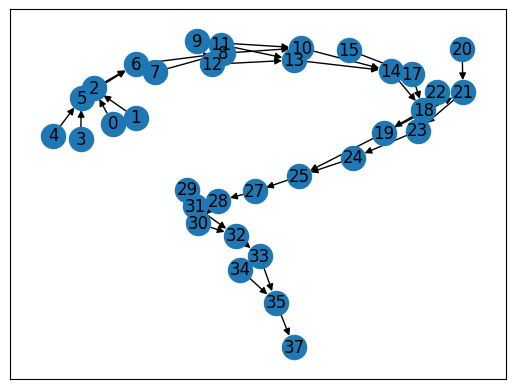

In [10]:
import networkx as nx
cg = MT.mytensor.computegraph
simple_DiG=nx.DiGraph()
for i in cg._edgelist:
    simple_DiG.add_edge(i['from'],i['to'])
nx.draw_networkx(simple_DiG,pos=nx.spring_layout(simple_DiG))

In [20]:
counter=0
for i in cg._nodelist:
    print(counter)
    counter+=1
    if type(i).__name__ == 'mytensor' or type(i).__name__ == 'mytensorloss' or type(i).__name__ == 'myparameter':
        print(i.__dict__)
        print('==================================')
    else:
        print(i)
        print('==================================')

0
{'tensortype': 'tensor32', 'with_grad': True, '_cg_descend': [2], '_cg_ascend': [], '_grad_f': tensor32([[ 0.12471187 -0.084971    0.06914134  0.04172961]
 [ 0.12471198 -0.08497108  0.0691414   0.04172962]
 [-0.01829926 -0.01804726  0.13736257  0.2221632 ]
 [ 0.12471411 -0.08497252  0.06914227  0.04172983]
 [ 0.12471245 -0.0849714   0.06914158  0.04172967]
 [ 0.02468698  0.02740471 -0.14751449 -0.23312378]
 [-0.01861994 -0.01821938  0.13893643  0.2247088 ]
 [ 0.12472337 -0.08497889  0.06914608  0.04173072]
 [ 0.12471302 -0.08497179  0.06914182  0.04172972]
 [ 0.12471189 -0.08497101  0.06914136  0.04172962]
 [ 0.0246447   0.02737424 -0.1472813  -0.23274854]
 [-0.10133414  0.09645997  0.0006414   0.08341423]
 [-0.0187145  -0.01845911  0.1400246   0.22642255]
 [ 0.12471309 -0.08497185  0.06914186  0.04172973]
 [ 0.12471963 -0.08497632  0.06914455  0.04173036]
 [-0.06017826 -0.01218989  0.08374501  0.17520781]
 [ 0.02828715  0.03126367 -0.17154604 -0.27152124]
 [ 0.02481441  0.02758269 -

In [26]:
cg._nodelist.index(softmax(pred))

82

In [79]:
grad_torchloss_output

(tensor([[-1.0245e-08,  1.0005e-08,  2.0194e-10],
         [-3.2596e-08,  3.1324e-08,  1.4447e-09],
         [ 8.1302e-06, -1.1865e-04,  1.1052e-04],
         [-4.2375e-07,  4.2316e-07,  1.4887e-09],
         [-1.1828e-07,  1.1724e-07,  6.9557e-10],
         [ 4.9045e-07,  1.6729e-04, -1.6778e-04],
         [ 4.6172e-05, -4.6951e-04,  4.2334e-04],
         [-2.1560e-06,  2.1538e-06,  1.8744e-09],
         [-2.2352e-07,  2.2234e-07,  8.6108e-10],
         [-1.3039e-08,  1.2578e-08,  2.4202e-10],
         [ 3.7381e-06,  1.1701e-04, -1.2074e-04],
         [ 8.3610e-04, -2.2237e-03,  1.3876e-03],
         [ 1.4390e-05, -6.7082e-04,  6.5643e-04],
         [-2.4028e-07,  2.3844e-07,  2.0375e-09],
         [-1.4566e-06,  1.4547e-06,  1.5997e-09],
         [ 4.2346e-06, -7.3733e-06,  3.1394e-06],
         [ 1.1742e-05,  5.1038e-03, -5.1156e-03],
         [ 1.0304e-05,  3.6345e-04, -3.7376e-04],
         [ 7.0693e-06, -1.5091e-04,  1.4384e-04],
         [ 2.6671e-07,  1.1642e-06, -1.4314e-06],


In [85]:
cg._computegraph__find_edges(18,19)

{'from': 18, 'to': 19, 'forward': {'op': 'mytensor.exp'}}

In [20]:
0.016666666*60

0.99999996

In [65]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

iris = datasets.load_iris()
X = iris.data  
y = iris.target  


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)


X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

d:\Python&Conda_Env\Python3.9(Global)\lib\site-packages\sklearn\preprocessing\_encoders.py:808: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [11]:
import torch


x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)


softmax = torch.nn.Softmax(dim=0)
s = softmax(x)


loss = s.sum()  


loss.backward()


print("Softmax output:\n", s)
print("Gradient of x:\n", x.grad)

Softmax output:
 tensor([0.0900, 0.2447, 0.6652], grad_fn=<SoftmaxBackward0>)
Gradient of x:
 tensor([0., 0., 0.])


In [1]:
import MyTensor as MT
import MyNN as MN
import Loss
myten=MT.mytensor([[1.0, 2.0, 3.0]])
Mysoft_res=MN.my_softmax()(myten)

tensor32([[ 2.718282   7.3890557 20.085537 ]])
tensor32([[30.192875]])
tensor32([[30.192875 30.192875 30.192875]])
tensor32([[0.0331204 0.0331204 0.0331204]])
tensor32([[0.09003058 0.24472846 0.66524094]])


In [2]:
loss

NameError: name 'loss' is not defined

In [3]:
class Lf(Loss.loss):
    def __init__(self,comment=None):
        super().__init__(comment)
    def _loss(self, softmax=None, label=None):
        return MT.dot(softmax,MT.ones((3,1)))

In [4]:
Lf1 = Lf()
Lf1(Mysoft_res,None)
Lf1.backward(mode='force')

In [5]:
Lf1

<class '__main__.Lf'>: 1.0

In [6]:
myten._grad

tensor32([[0. 0. 0.]])

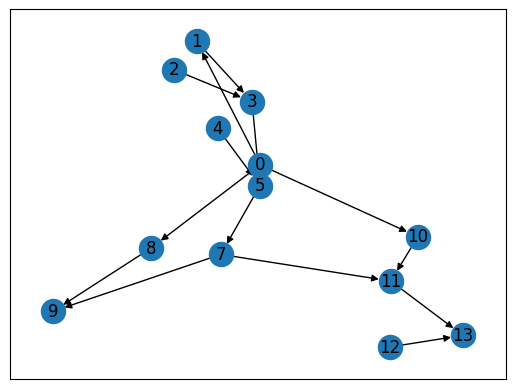

In [7]:
import networkx as nx
cg = MT.mytensor.computegraph
simple_DiG=nx.DiGraph()
for i in cg._edgelist:
    simple_DiG.add_edge(i['from'],i['to'])
nx.draw_networkx(simple_DiG,pos=nx.spring_layout(simple_DiG))

In [7]:
cg._nodelist.index(Lf1._tensorloss)

11

In [18]:
cg._computegraph__find_edges(0,1)

{'from': 0, 'to': 1, 'forward': {'op': 'mytensor.exp'}}

In [17]:
cg._nodelist[1].__dict__

{'tensortype': 'tensor32',
 'with_grad': True,
 '_cg_descend': [3, 8, 9],
 '_cg_ascend': [0],
 '_grad_f': tensor32([[0. 0. 0.]]),
 'grad': tensor32([[0. 0. 0.]]),
 'npar_data': array([[ 2.718282 ,  7.3890557, 20.085537 ]], dtype=float32),
 'shape': (1, 3)}